In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy.stats as stats
import seaborn as sns

from scipy.interpolate import griddata

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")
%load_ext watermark
az.rcParams["stats.hdi_prob"] = 0.89  # sets default credible interval used by arviz

#### Simulation of field trip

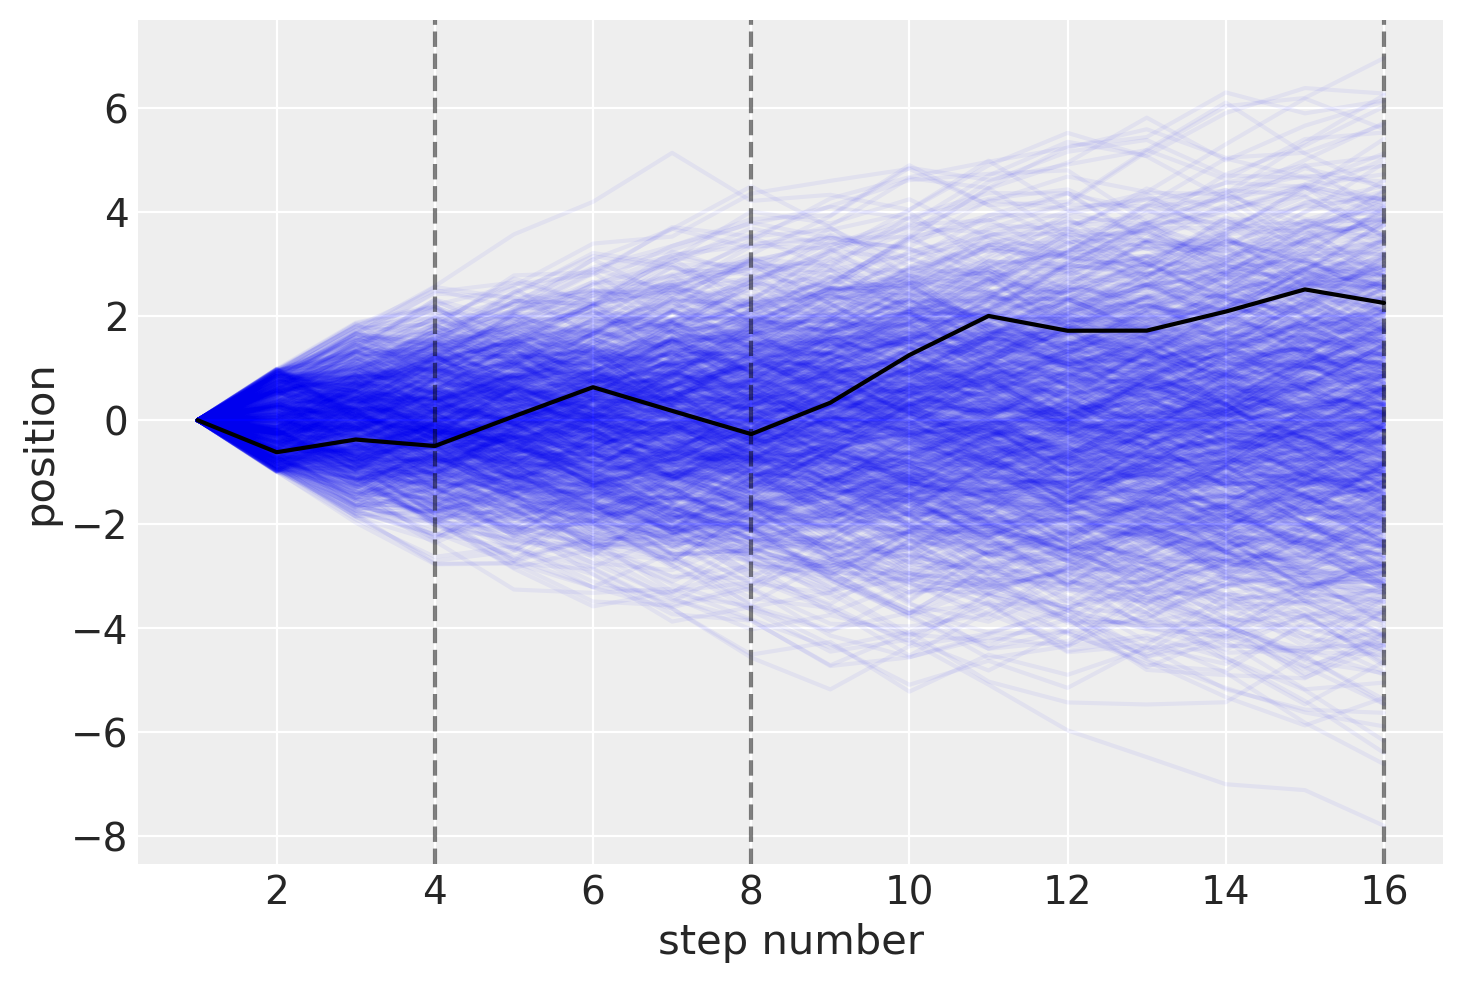

In [3]:
np.random.seed(1234)
steps = 16
repetitions = 1000
x = np.zeros([steps, repetitions])
for i in range(x.shape[1]):
    x[1:, i] = np.cumsum(np.random.uniform(-1, 1, steps - 1))

plt.plot(range(1, 17), x[:, :], c="b", alpha=0.05)
plt.plot(range(1, 17), x[:, 0], c="k")
plt.axvline(4, linestyle="--", c="k", alpha=0.5)
plt.axvline(8, linestyle="--", c="k", alpha=0.5)
plt.axvline(16, linestyle="--", c="k", alpha=0.5)
plt.xlabel("step number")
plt.ylabel("position")
plt.show()

/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.01 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level fun

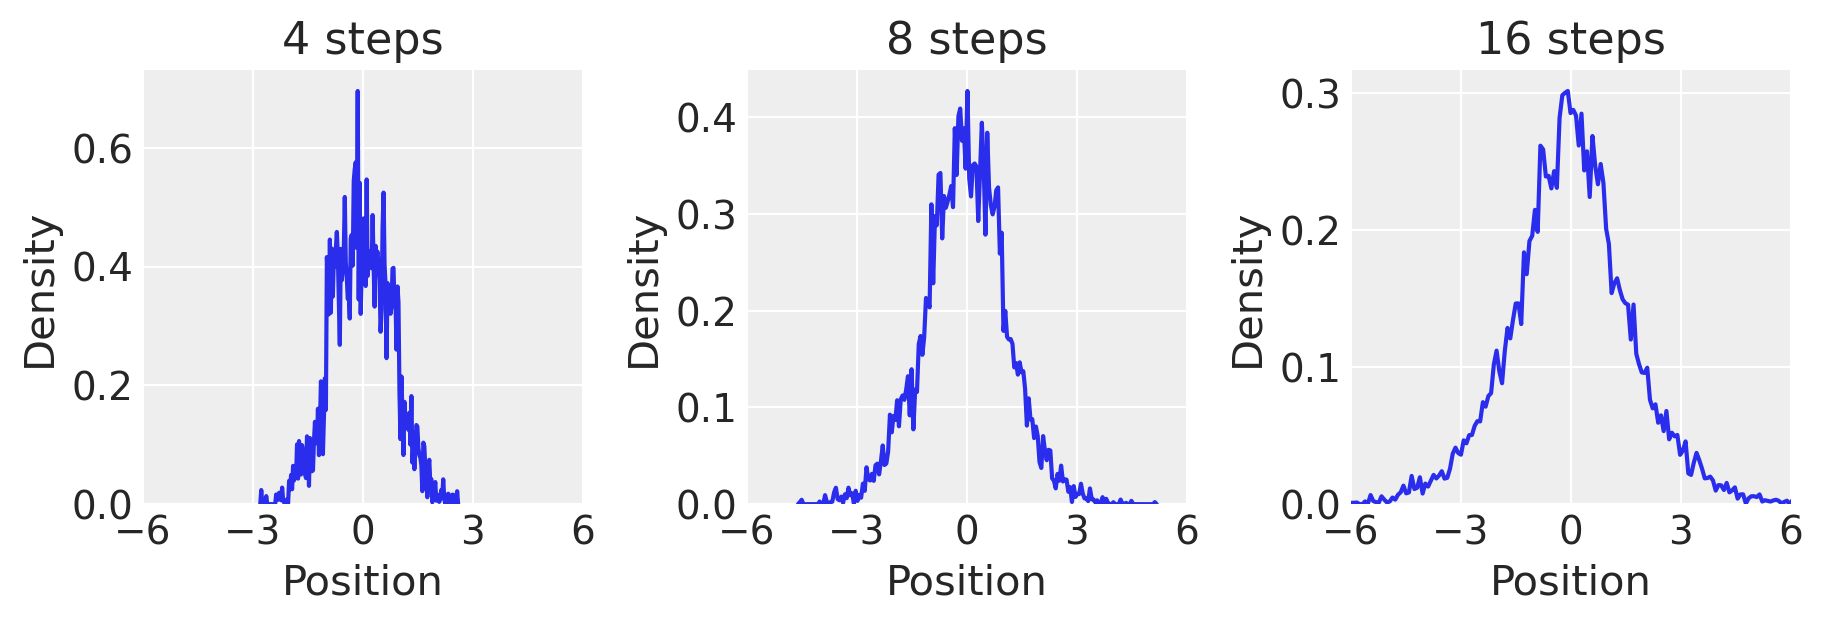

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(9, 3), sharex=True)
sns.distplot(x[1:4, :], kde_kws={"bw": 0.01}, ax=ax[0], hist=False)
sns.distplot(x[1:8, :], kde_kws={"bw": 0.01}, ax=ax[1], hist=False)
sns.distplot(x[1:, :], kde_kws={"bw": 0.01}, ax=ax[2], hist=False)

ax[0].set_title("4 steps")
ax[1].set_title("8 steps")
ax[2].set_title("16 steps")

for i in range(3):
    ax[i].set_ylabel("Density")
    ax[i].set_xlabel("Position")
    ax[i].set_xlim(-6, 6)
    ax[i].set_xticks([-6, -3, 0, 3, 6])

#### Code 4.1

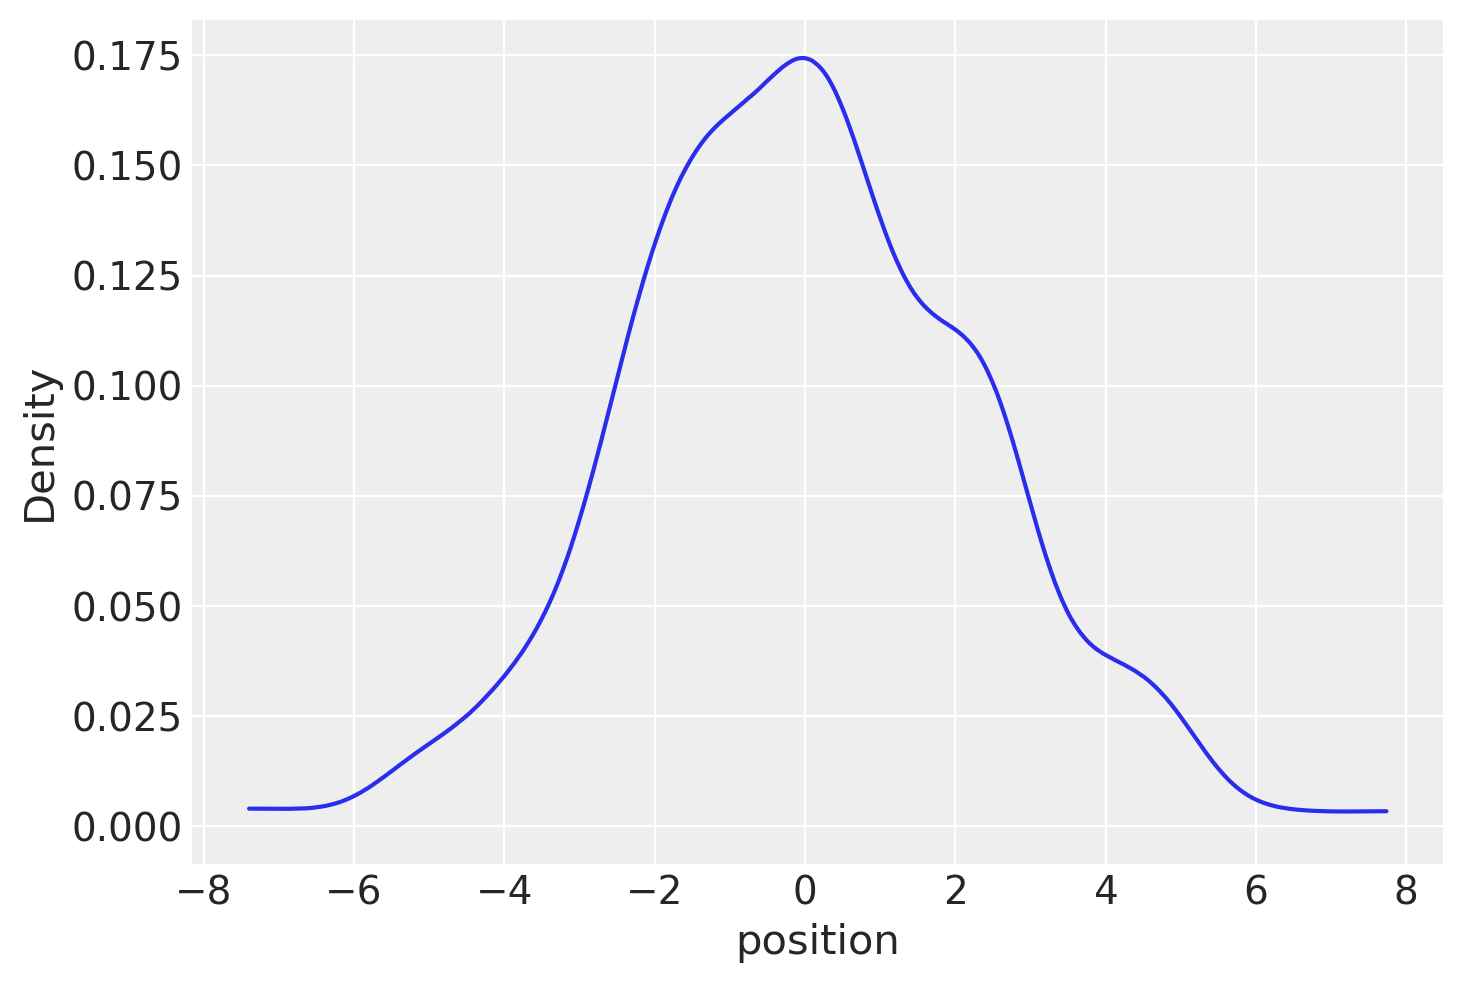

In [5]:
pos = np.random.uniform(-1, 1, size=(16, 1000)).sum(0)
az.plot_kde(pos)
plt.xlabel("position")
plt.ylabel("Density");

#### Code 4.2 and 4.3

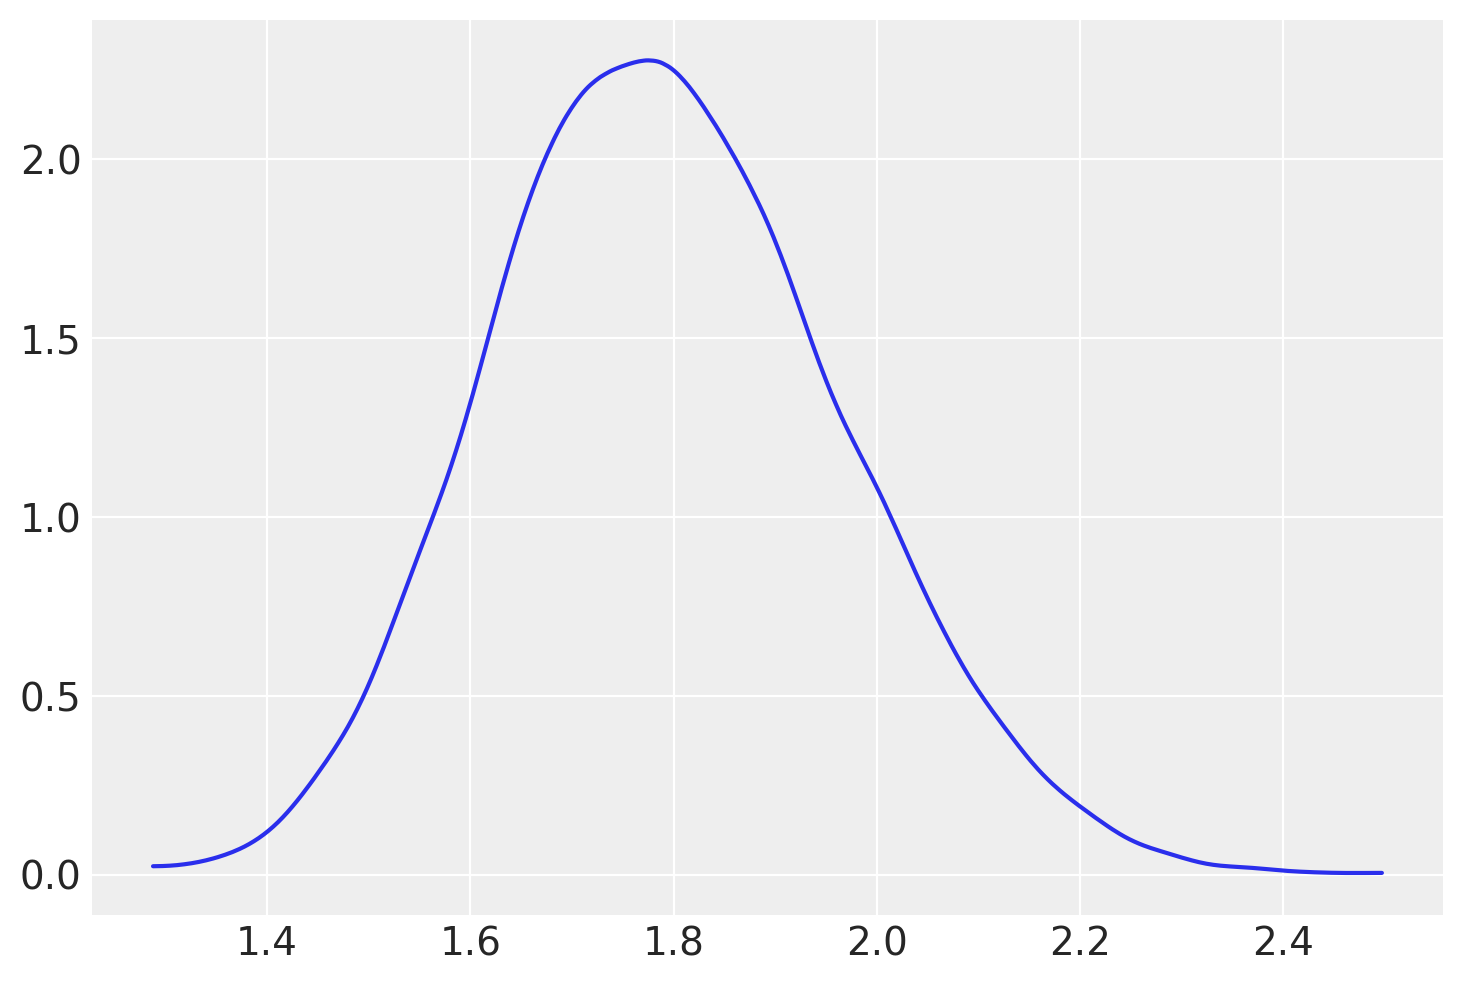

In [6]:
pos = np.random.uniform(1, 1.1, size=(12, 10000)).prod(0)
az.plot_kde(pos);

#### Code 4.4

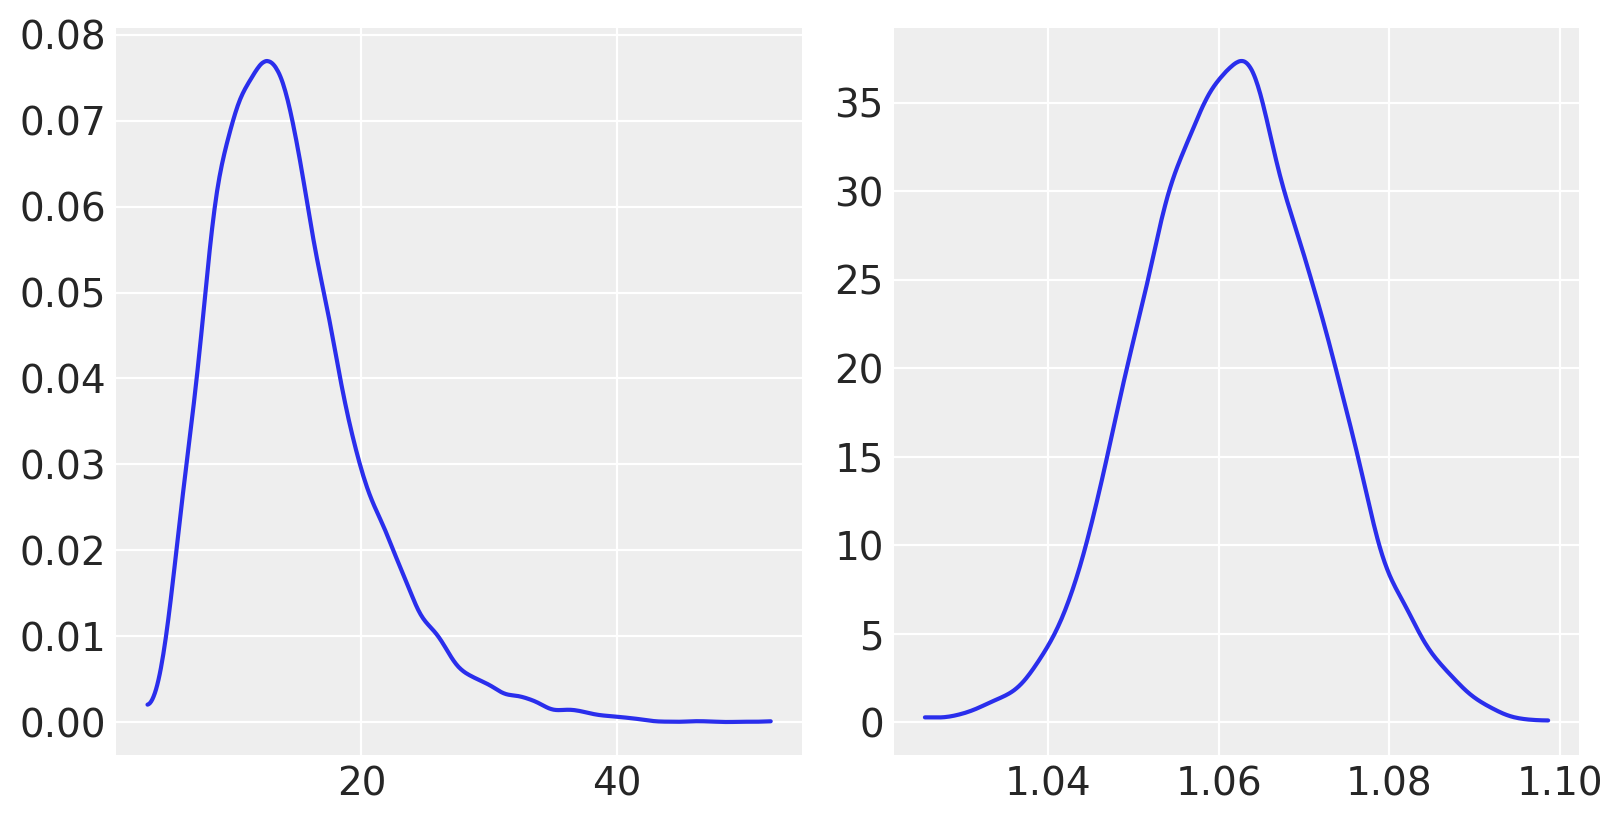

In [7]:
big = np.random.uniform(1, 1.5, size=(12, 10000)).prod(0)
small = np.random.uniform(1, 1.01, size=(12, 10000)).prod(0)
_, ax = plt.subplots(1, 2, figsize=(8, 4))
az.plot_kde(big, ax=ax[0])
az.plot_kde(small, ax=ax[1]);

#### Code 4.5

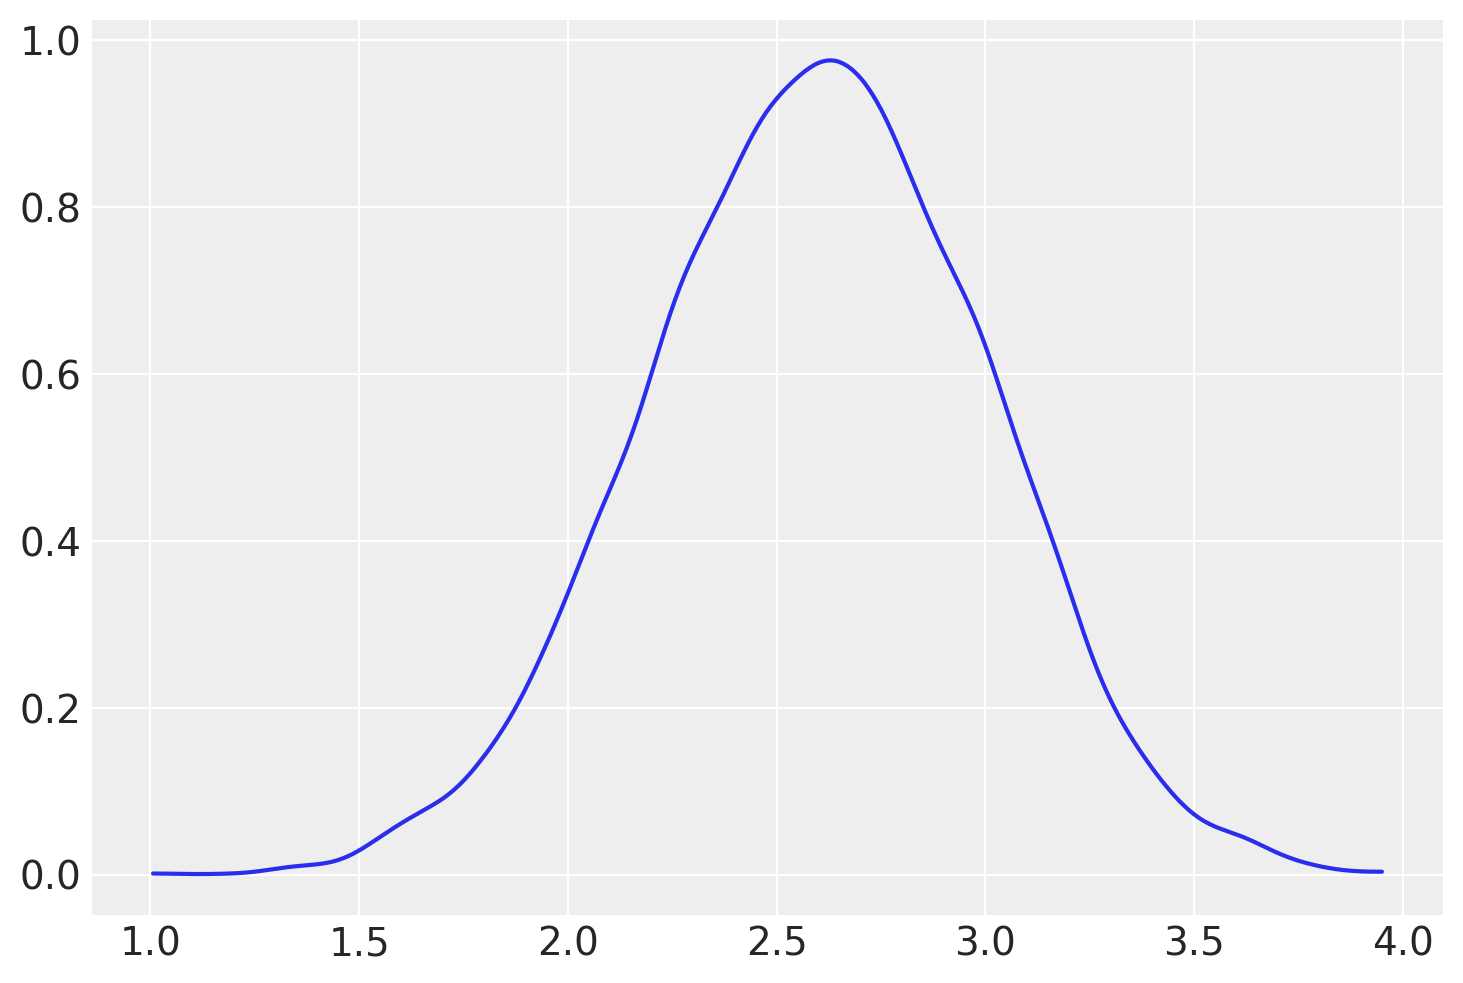

In [8]:
log_big = np.log(np.random.uniform(1, 1.5, size=(12, 10000)).prod(0))
az.plot_kde(log_big);

#### Code 4.6

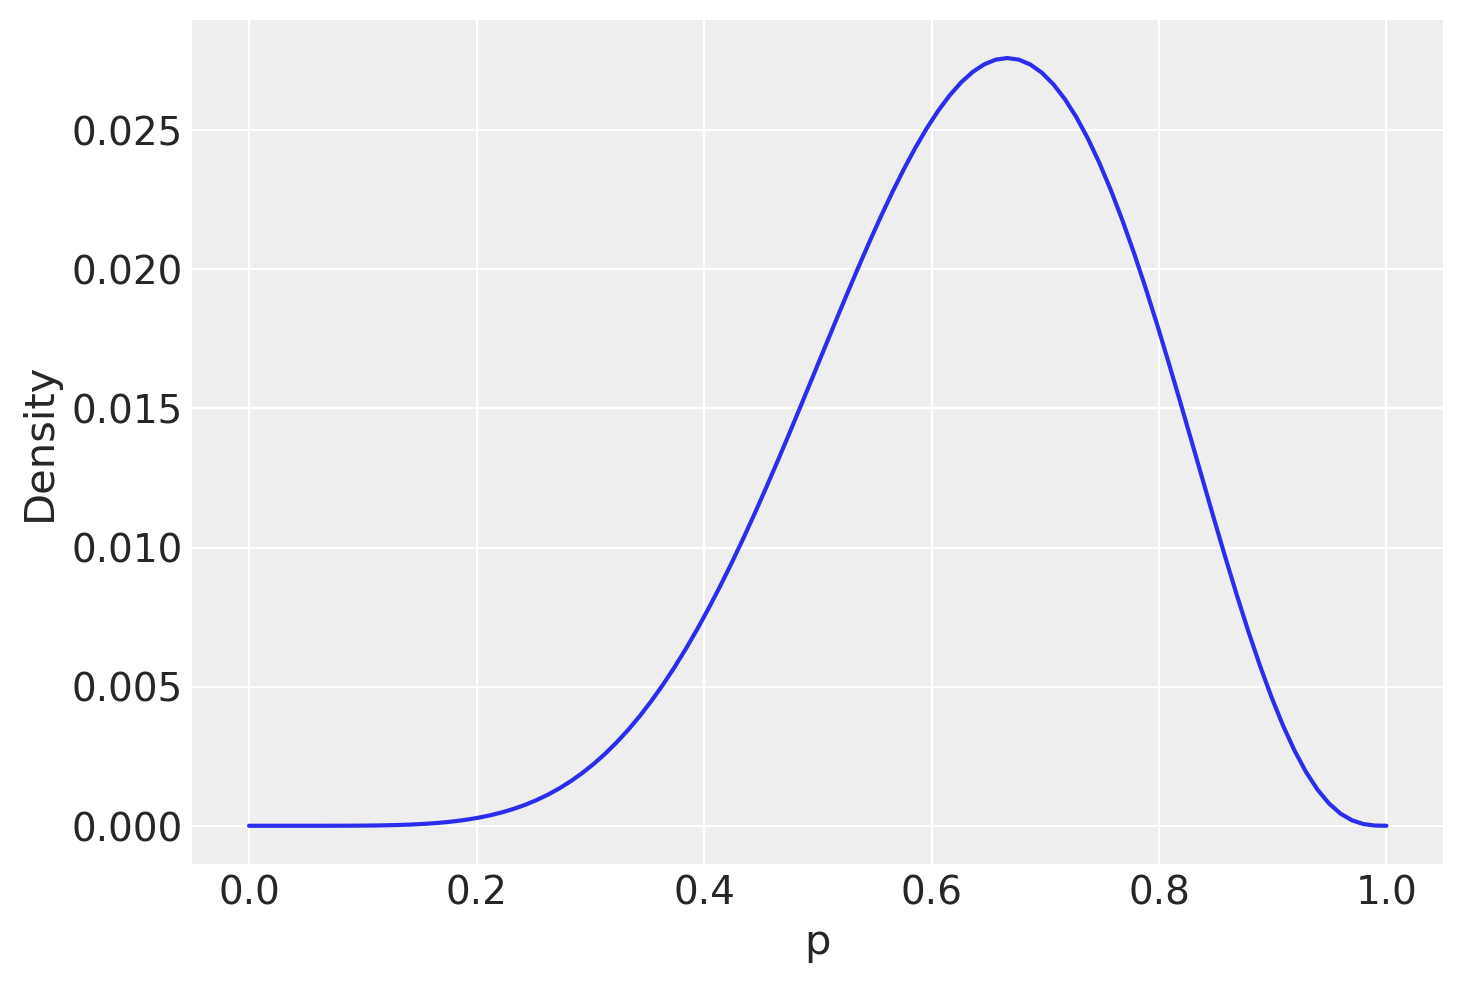

In [9]:
w, n = 6, 9
p_grid = np.linspace(0, 1, 100)
posterior = stats.binom.pmf(k=w, n=n, p=p_grid) * stats.uniform.pdf(p_grid, 0, 1)
posterior = posterior / (posterior).sum()
plt.plot(p_grid, posterior)
plt.xlabel("p")
plt.ylabel("Density");

#### Code 4.7 and 4.8

In [10]:
d = pd.read_csv("Data/Howell1.csv", sep=";", header=0)
d.head()

height     weight   age  male
0  151.765  47.825606  63.0     1
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
3  156.845  53.041914  41.0     1
4  145.415  41.276872  51.0     0

#### Code 4.9

In [11]:
az.summary(d.to_dict(orient="list"), kind="stats")

mean      sd  hdi_5.5%  hdi_94.5%
height  138.264  27.602    90.805    170.180
weight   35.611  14.719    11.368     55.707
age      29.344  20.747     0.000     57.000
male      0.472   0.500     0.000      1.000

#### Code 4.10

In [12]:
d.height

0      151.765
1      139.700
2      136.525
3      156.845
4      145.415
        ...   
539    145.415
540    162.560
541    156.210
542     71.120
543    158.750
Name: height, Length: 544, dtype: float64

#### Code 4.11

In [13]:
d2 = d[d.age >= 18]

#### Code 4.12

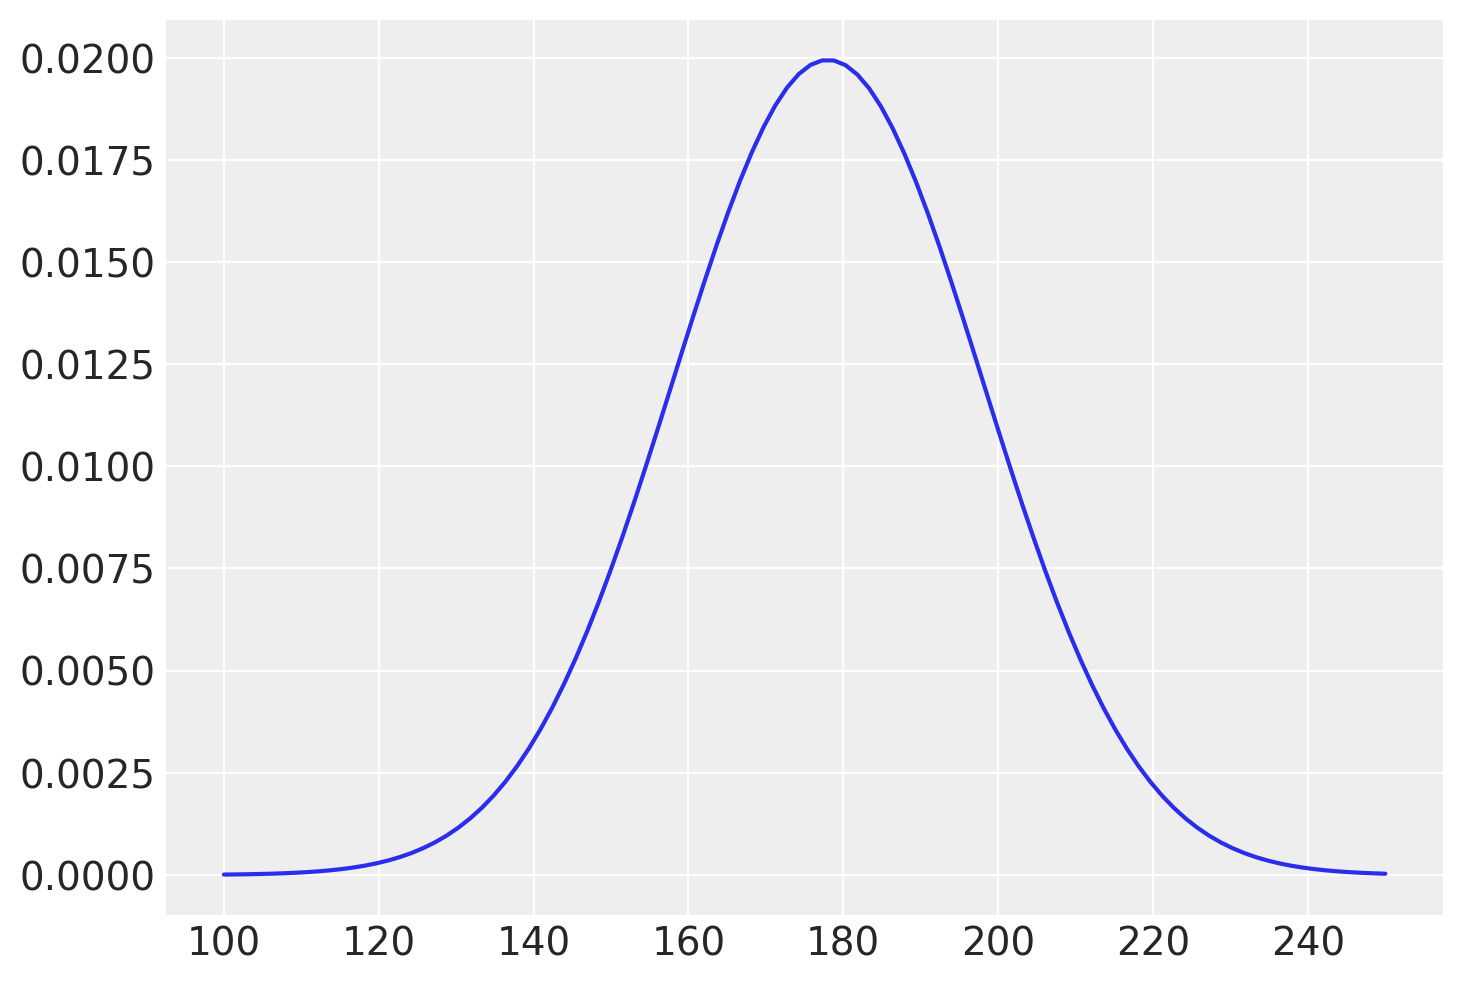

In [14]:
x = np.linspace(100, 250, 100)
plt.plot(x, stats.norm.pdf(x, 178, 20));

#### Code 4.13

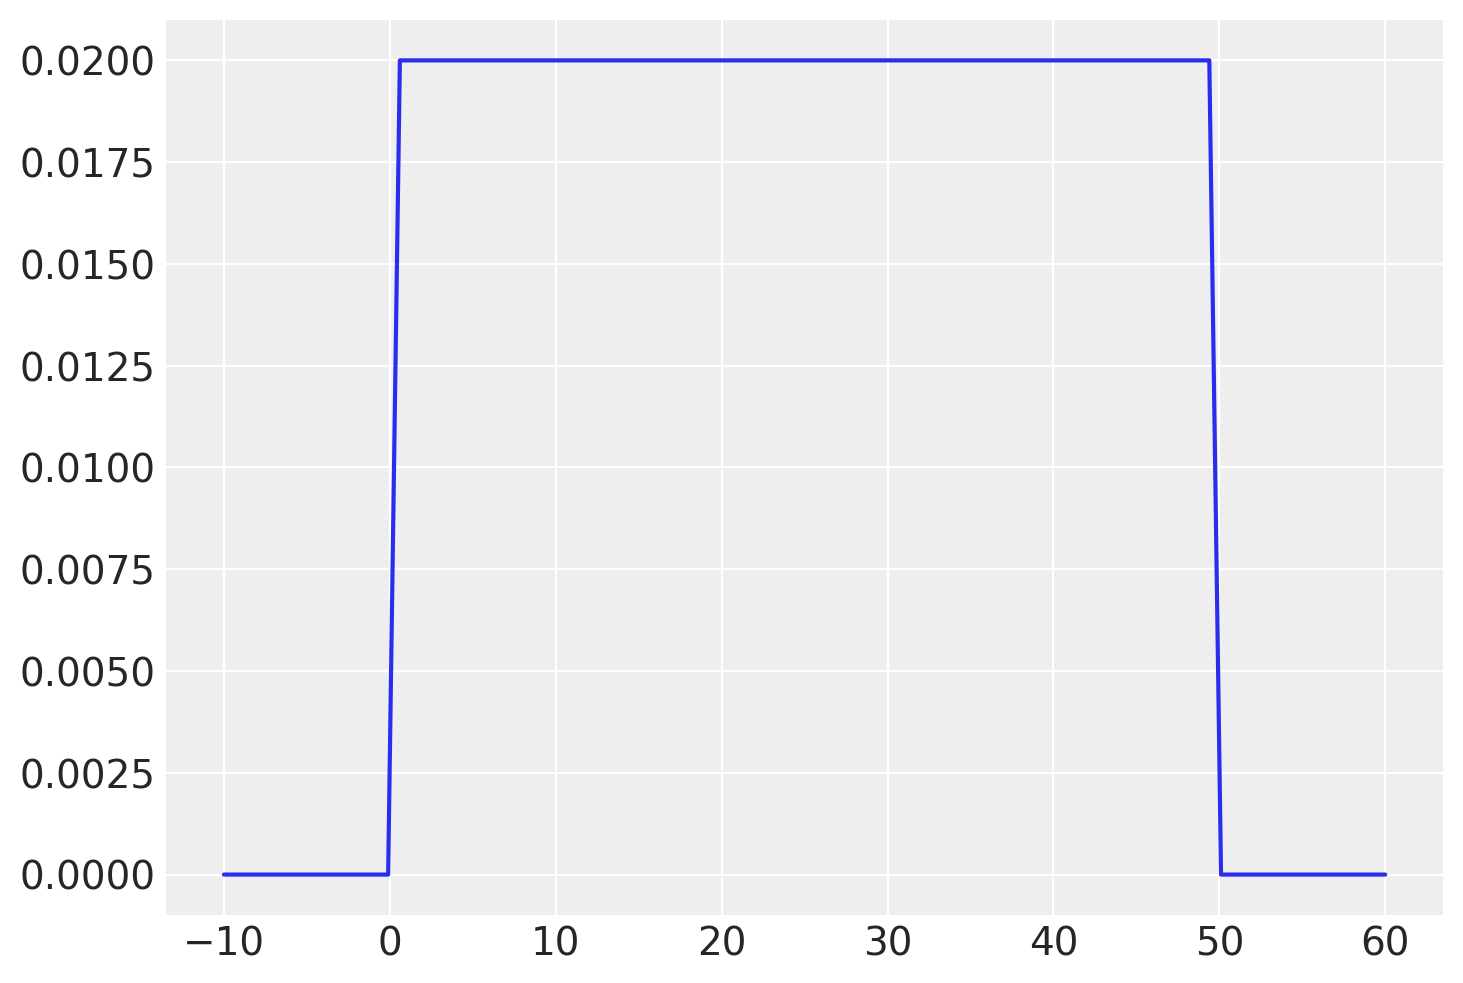

In [15]:
x = np.linspace(-10, 60, 100)
plt.plot(x, stats.uniform.pdf(x, 0, 50));

#### Code 4.14

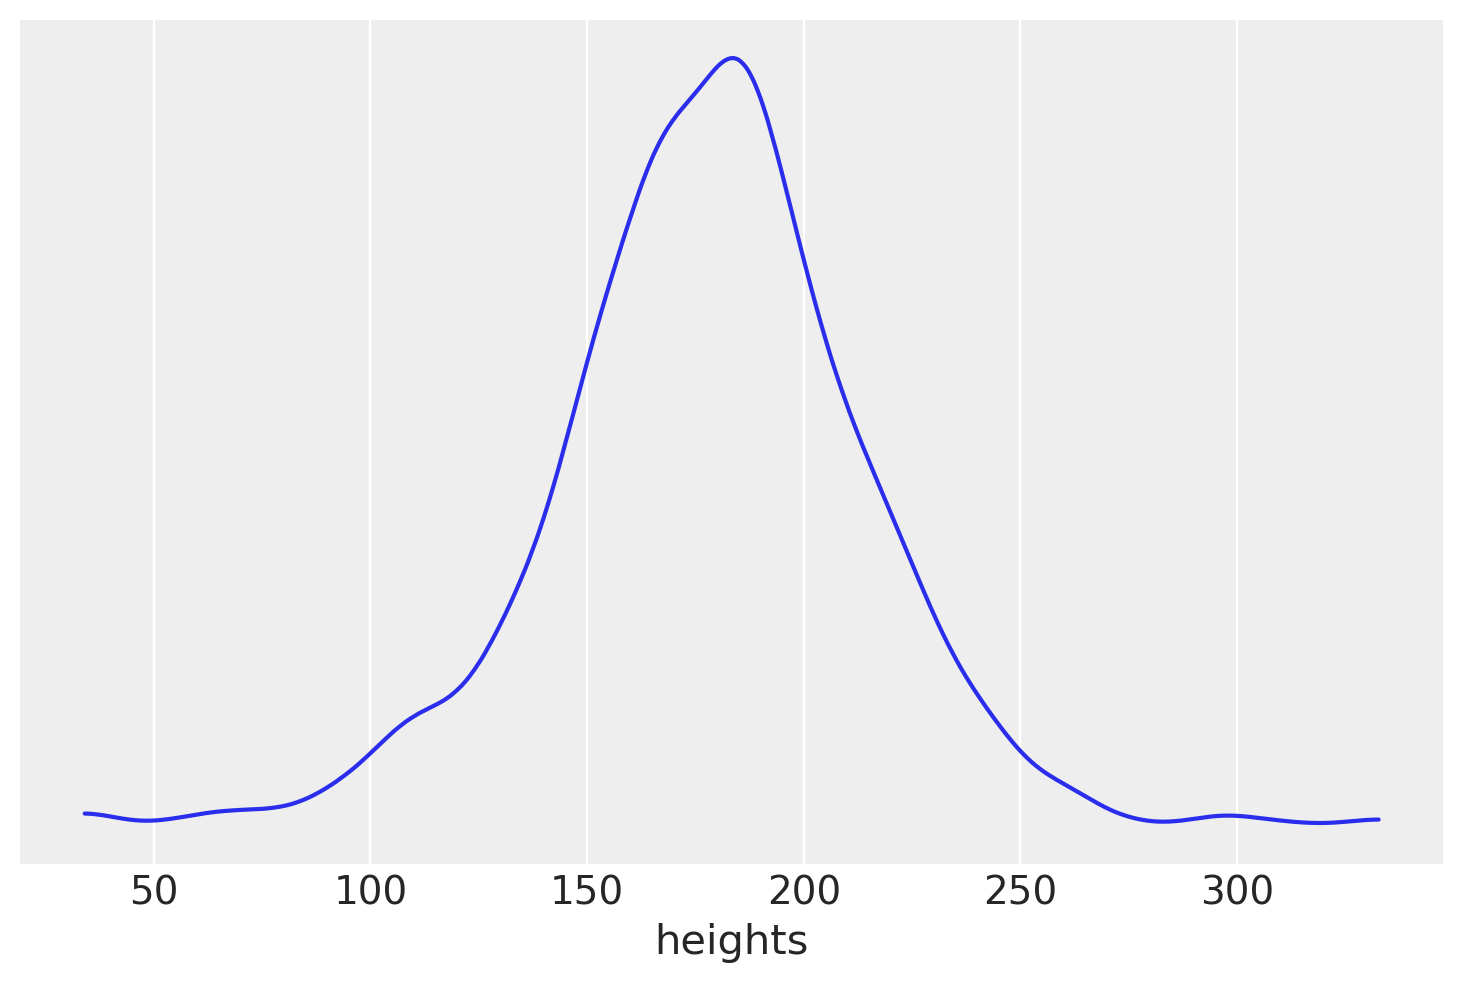

In [16]:
n_samples = 1000
sample_mu = stats.norm.rvs(loc=178, scale=20, size=n_samples)
sample_sigma = stats.uniform.rvs(loc=0, scale=50, size=n_samples)
prior_h = stats.norm.rvs(loc=sample_mu, scale=sample_sigma)
az.plot_kde(prior_h)
plt.xlabel("heights")
plt.yticks([]);

#### Code 4.15

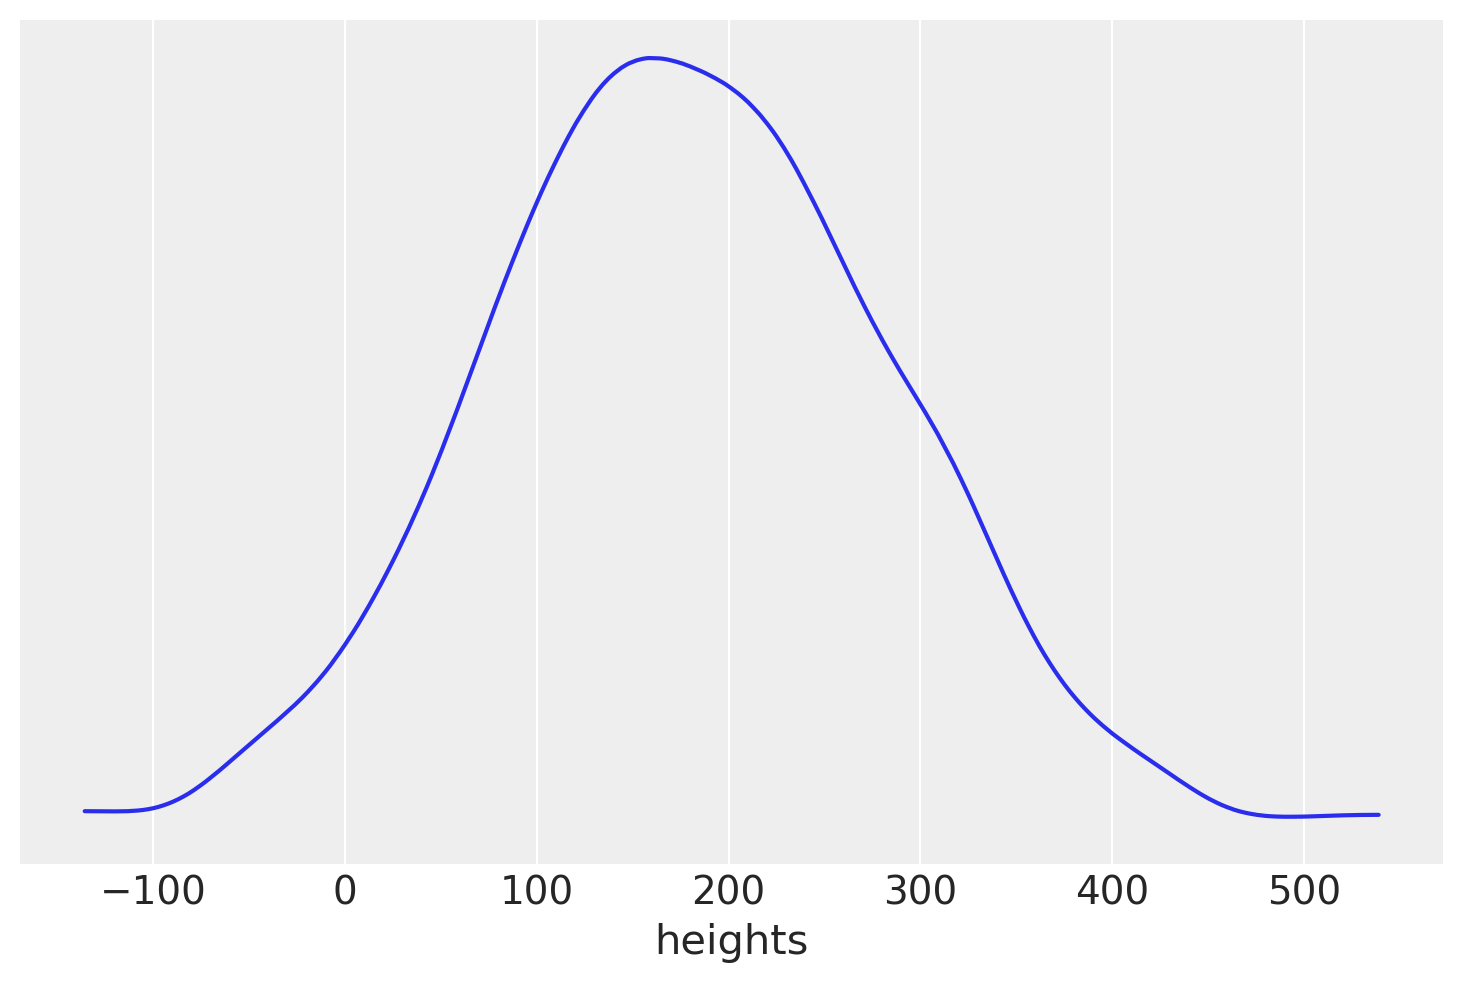

In [17]:
n_samples = 1000
sample_mu = stats.norm.rvs(loc=178, scale=100, size=n_samples)
prior_h = stats.norm.rvs(loc=sample_mu, scale=sample_sigma)
az.plot_kde(prior_h)
plt.xlabel("heights")
plt.yticks([]);

#### Code 4.16

In [18]:
post = np.mgrid[150:160:0.05, 7:9:0.05].reshape(2, -1).T

likelihood = [
    sum(stats.norm.logpdf(d2.height, loc=post[:, 0][i], scale=post[:, 1][i]))
    for i in range(len(post))
]

post_prod = (
    likelihood
    + stats.norm.logpdf(post[:, 0], loc=178, scale=20)
    + stats.uniform.logpdf(post[:, 1], loc=0, scale=50)
)
post_prob = np.exp(post_prod - max(post_prod))

#### Code 4.17

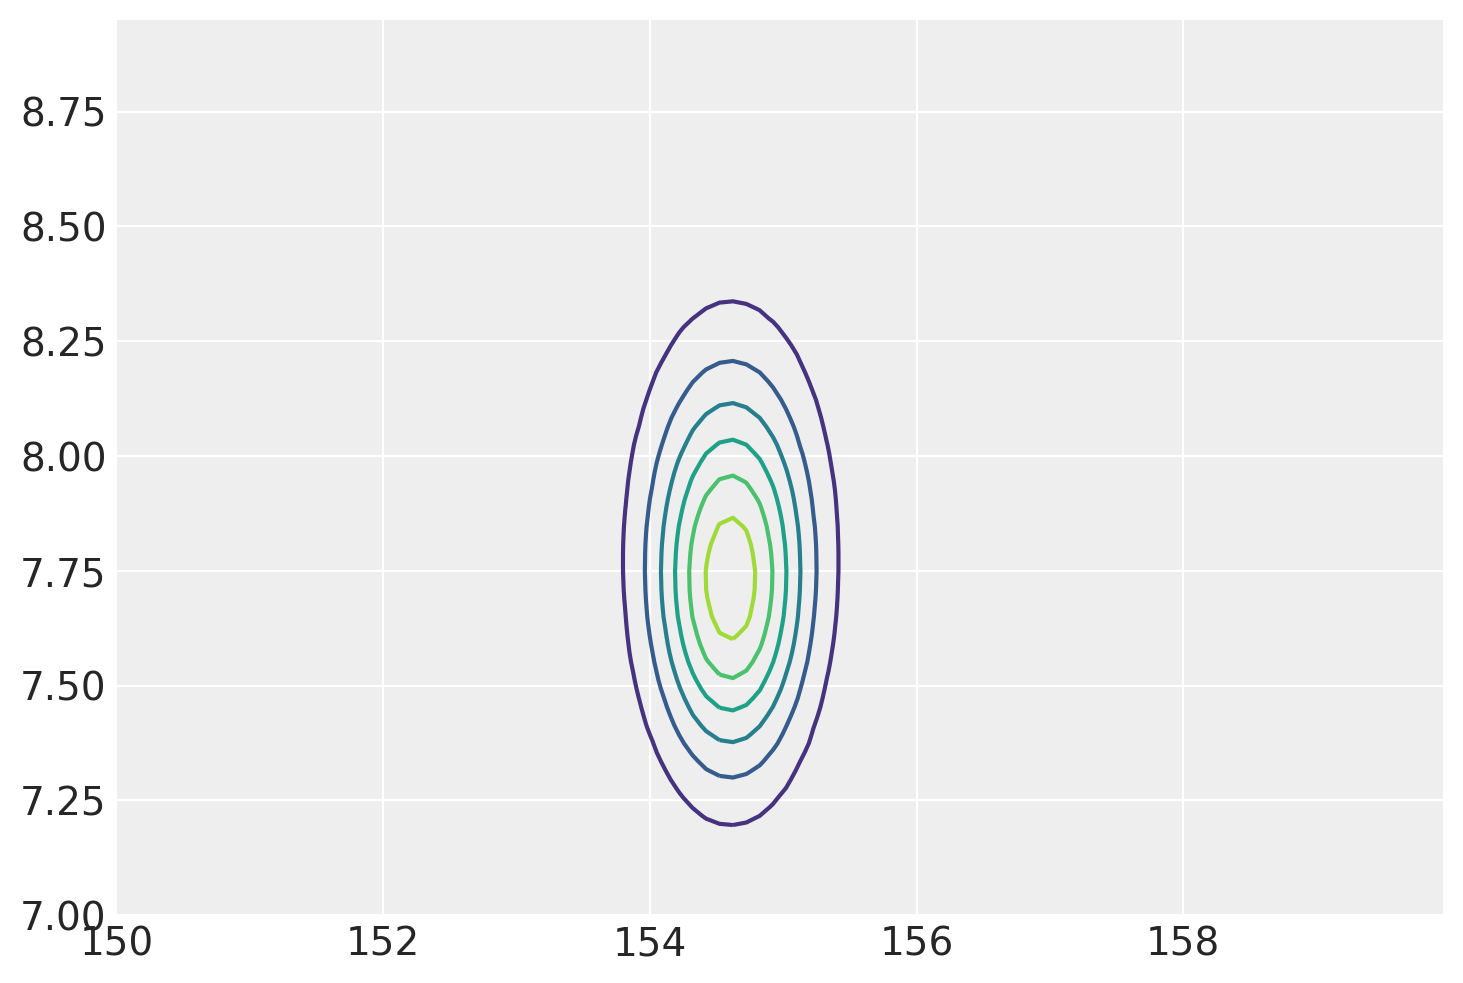

In [19]:
xi = np.linspace(post[:, 0].min(), post[:, 0].max(), 100)
yi = np.linspace(post[:, 1].min(), post[:, 1].max(), 100)
zi = griddata((post[:, 0], post[:, 1]), post_prob, (xi[None, :], yi[:, None]))

plt.contour(xi, yi, zi);

#### Code 4.18

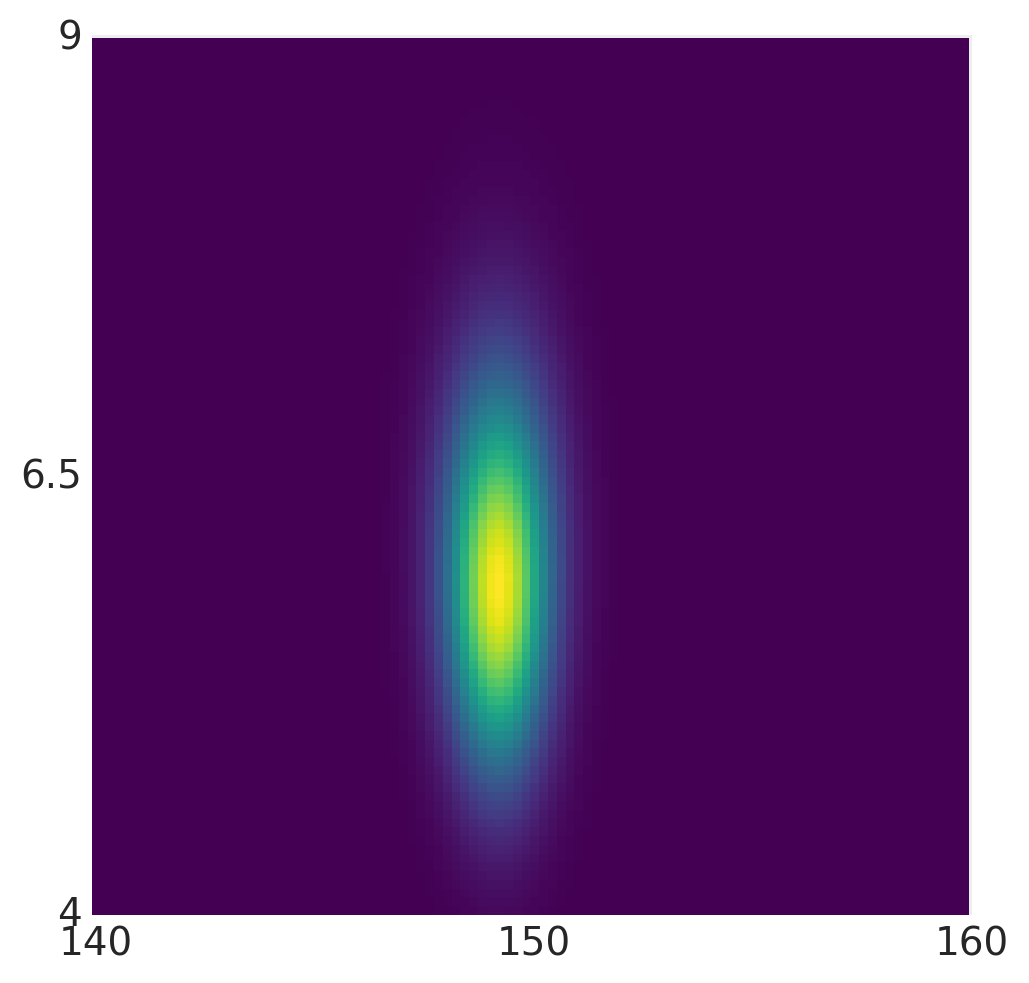

In [20]:
_, ax = plt.subplots()
ax.imshow(zi, origin="lower")
ax.set_xticks([0, 50, 100])
ax.set_xticklabels([140, 150, 160])
ax.set_yticks([0, 50, 100])
ax.set_yticklabels([4, 6.5, 9])
ax.grid(False);

#### Code 4.19 and 4.20

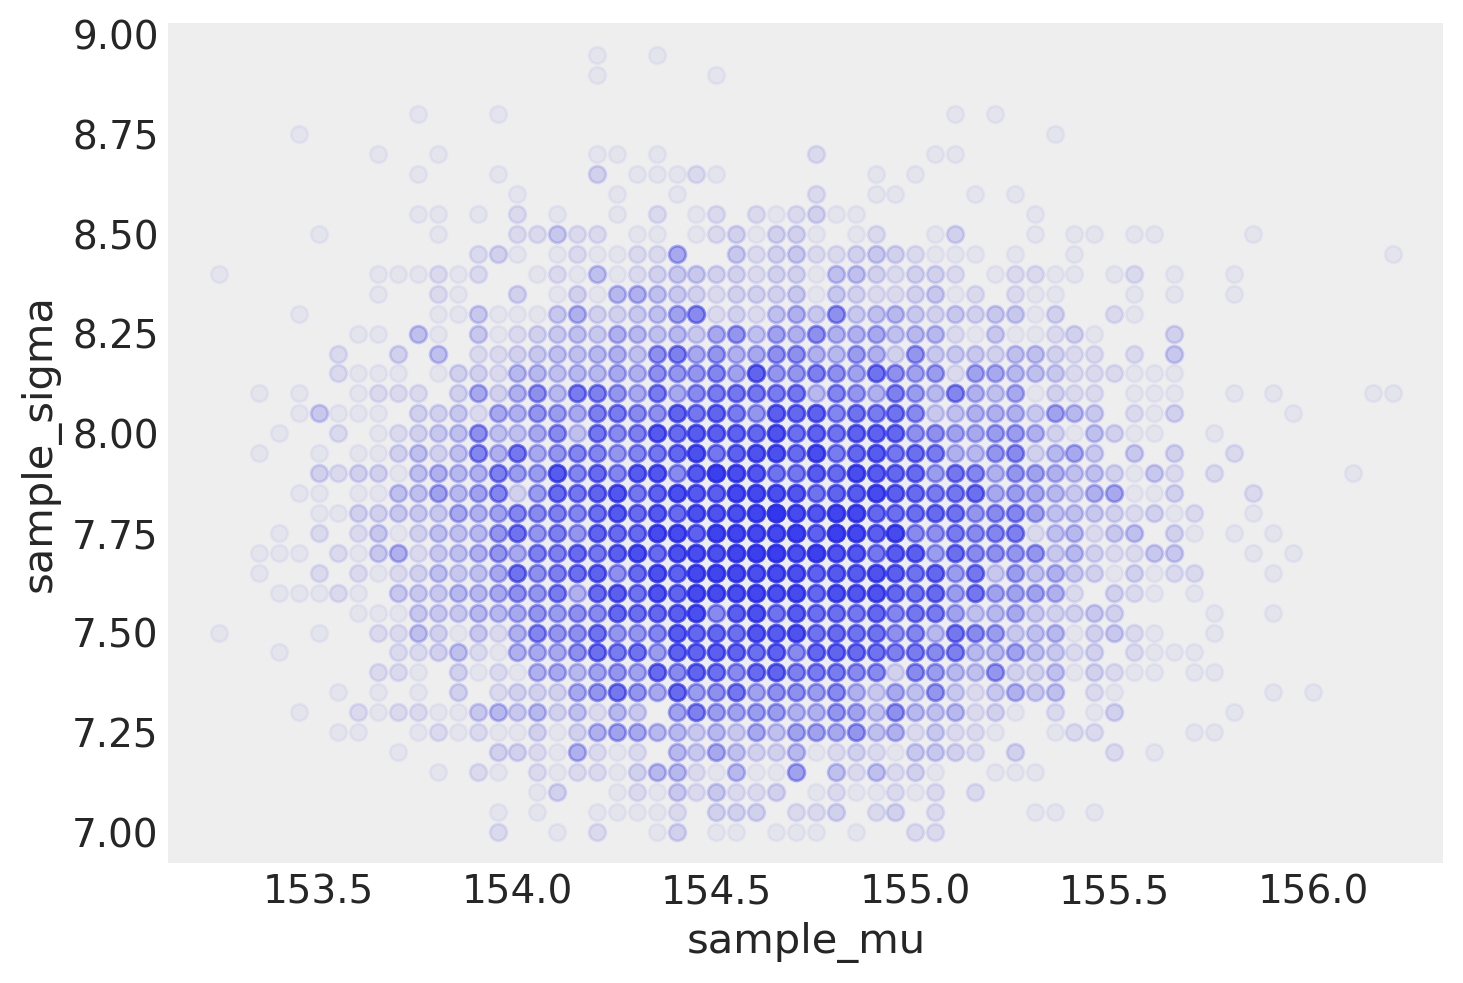

In [21]:
sample_rows = np.random.choice(
    np.arange(len(post)), size=10000, replace=True, p=(post_prob / post_prob.sum())
)
sample_mu = post[:, 0][sample_rows]
sample_sigma = post[:, 1][sample_rows]

plt.plot(sample_mu, sample_sigma, "o", alpha=0.05)
plt.axis("equal")
plt.grid(False)
plt.xlabel("sample_mu")
plt.ylabel("sample_sigma");

#### Code 4.21

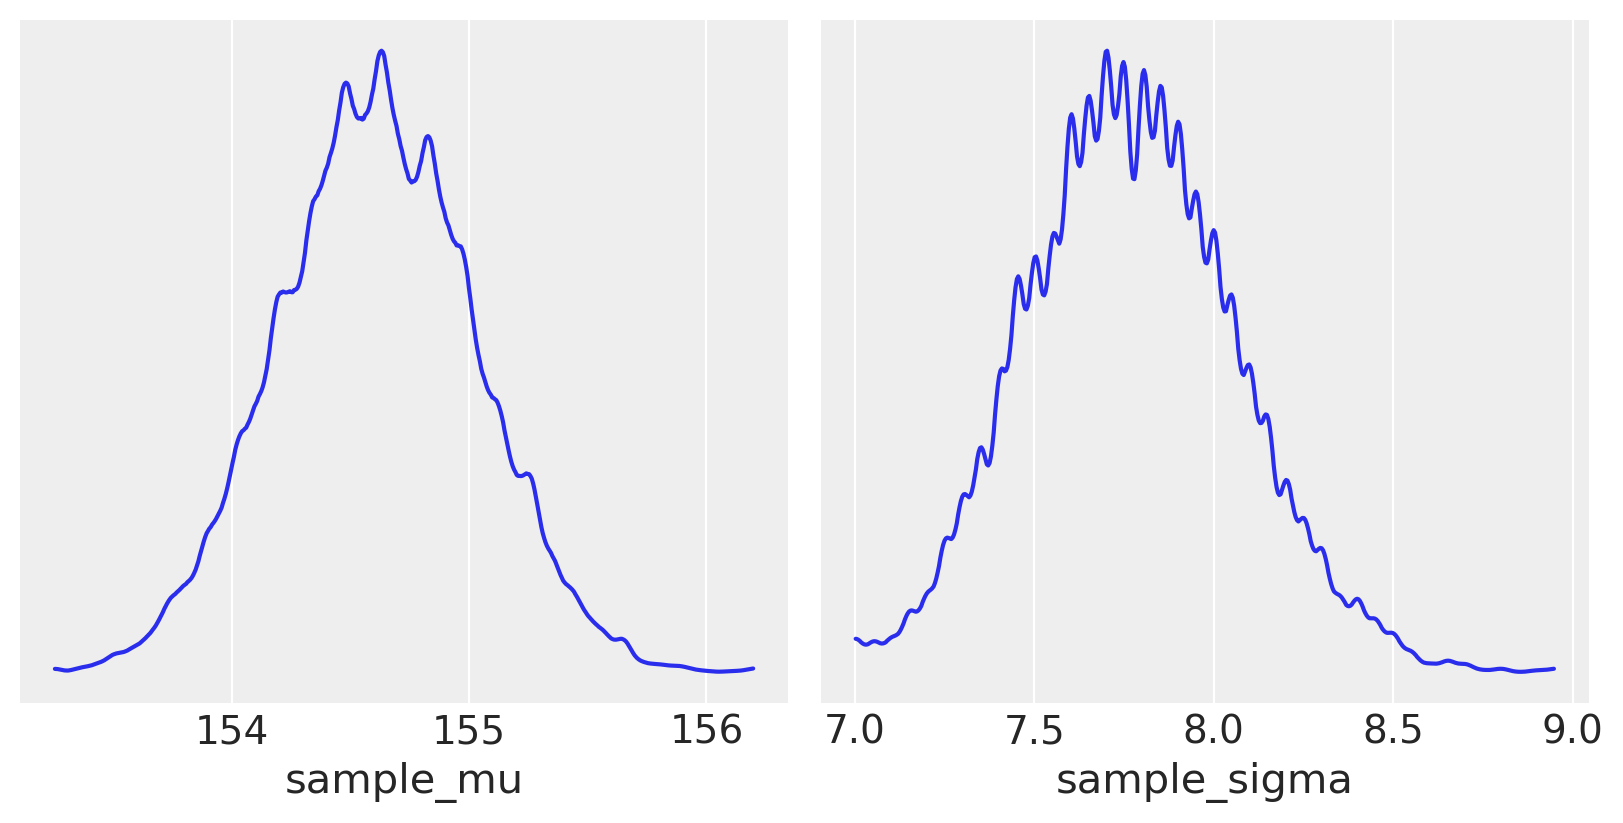

In [22]:
_, ax = plt.subplots(1, 2, figsize=(8, 4))
az.plot_kde(sample_mu, ax=ax[0])
ax[0].set_xlabel("sample_mu")
ax[0].set_yticks([])
az.plot_kde(sample_sigma, ax=ax[1])
ax[1].set_xlabel("sample_sigma")
ax[1].set_yticks([]);

#### Code 4.22

In [23]:
az.hdi(sample_mu), az.hdi(sample_sigma)

(array([153.9, 155.2]), array([7.3, 8.2]))

#### Code 4.23 and  4.24

In [24]:
d3 = np.random.choice(d2.height, 20)
post2 = np.mgrid[150:170:0.1, 4:20:0.1].reshape(2, -1).T

likelihood2 = [
    sum(stats.norm.logpdf(d3, loc=post2[:, 0][i], scale=post2[:, 1][i])) for i in range(len(post2))
]

post_prod2 = (
    likelihood2
    + stats.norm.logpdf(post2[:, 0], loc=178, scale=20)
    + stats.uniform.logpdf(post2[:, 1], loc=0, scale=50)
)

post_prob2 = np.exp(post_prod2 - max(post_prod2))

sample_rows2 = np.random.choice(
    np.arange(len(post2)), size=10000, replace=True, p=(post_prob2 / post_prob2.sum())
)
sample_mu2 = post2[:, 0][sample_rows2]
sample_sigma2 = post2[:, 1][sample_rows2]

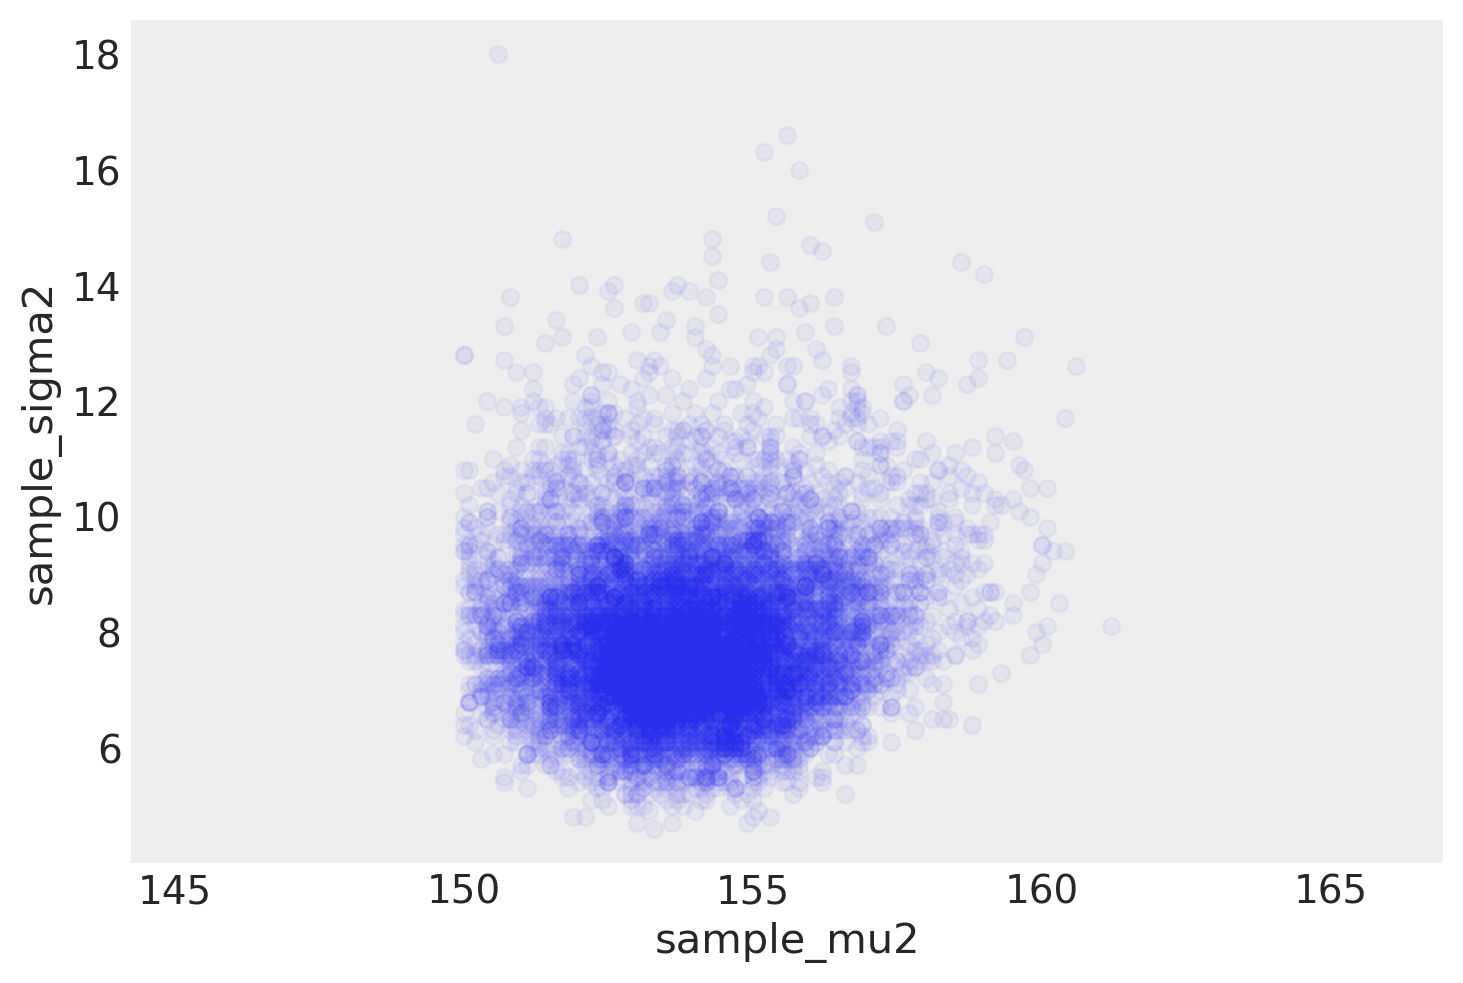

In [25]:
plt.plot(sample_mu2, sample_sigma2, "o", alpha=0.05)
plt.axis("equal")
plt.xlabel("sample_mu2")
plt.ylabel("sample_sigma2")
plt.grid(False);

#### Code 4.25

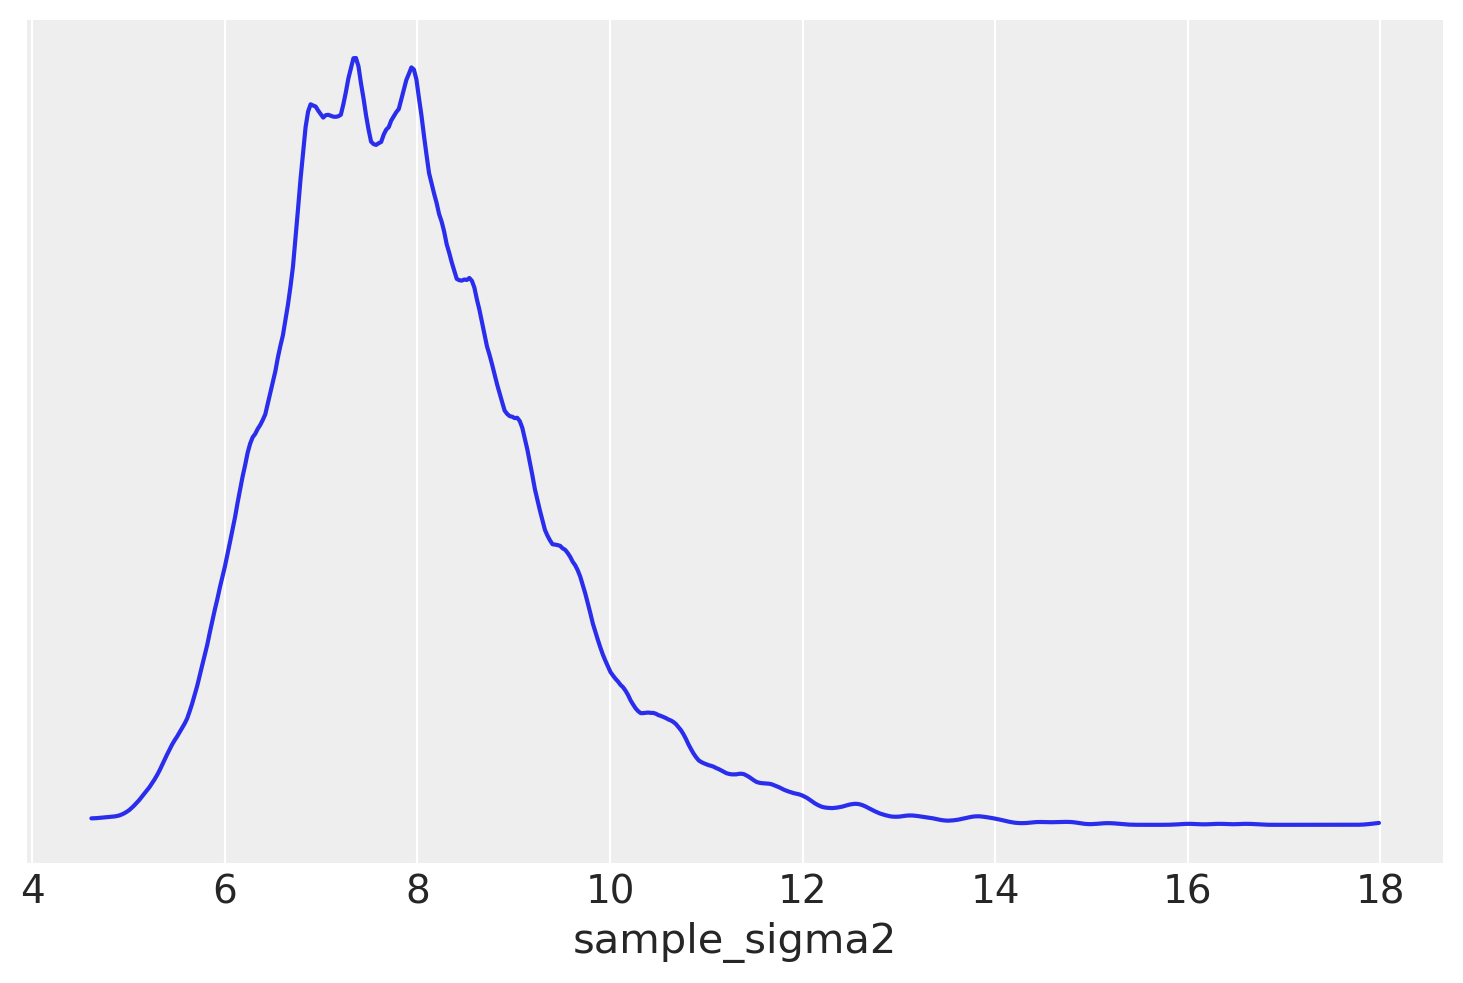

In [26]:
az.plot_kde(sample_sigma2)
plt.xlabel("sample_sigma2")
plt.yticks([]);

#### Code 4.26

We are repeating code 4.7, 4.8 and 4.10

In [27]:
d = pd.read_csv("Data/Howell1.csv", sep=";", header=0)
d2 = d[d.age >= 18]

#### Code 4.27

In [28]:
with pm.Model() as m4_1:
    mu = pm.Normal("mu", mu=178, sd=20)
    sigma = pm.Uniform("sigma", lower=0, upper=50)
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d2.height)

#### Code 4.28

We could use a quadratic approximation like McElreath does in his book and we did in code 2.6. But Using PyMC3 is really simple to just sample from the model using a "sampler method". Most common sampler methods are members of the Markov Chain Monte Carlo Method (MCMC) family (for details read Section 2.4.3 and Chapter 8 of Statistical Rethinking).

PyMC3 comes with various samplers. Some samplers are more suited than others for certain type of variable (and/or problems). For now we are going to let PyMC3 choose the sampler for us. PyMC3 also tries to provide a reasonable starting point for the simulation. By default PyMC3 uses the same adaptive procedure as in STAN `'jitter+adapt_diag'`, which starts with a identity mass matrix and then adapts a diagonal based on the variance of the tuning samples. 

You can read more details of PyMC3 [here](http://pymc-devs.github.io/pymc3/notebooks/getting_started.html)

In [29]:
with m4_1:
    trace_4_1 = pm.sample(1000, tune=1000)

/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 20 seconds.


/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

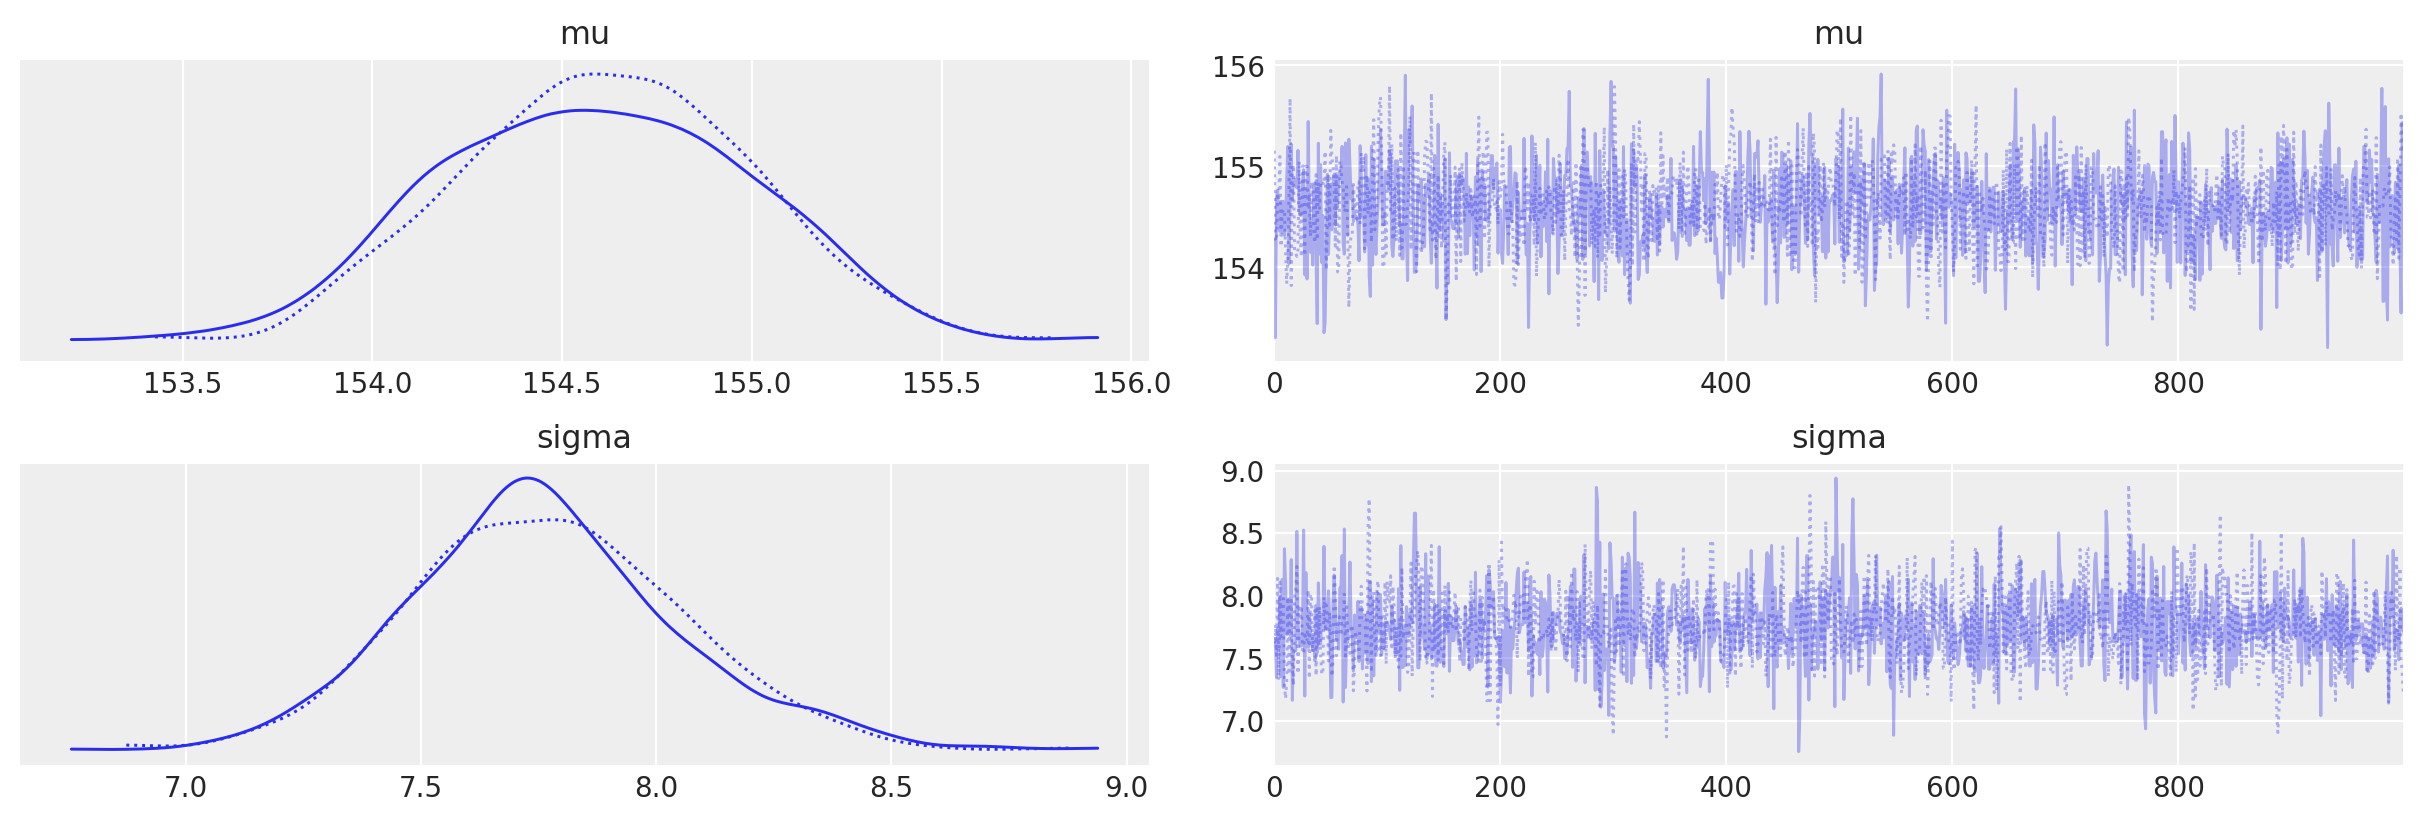

In [30]:
az.plot_trace(trace_4_1)
# this function lets you check the samples values

#### Code 4.29

In [31]:
az.summary(trace_4_1, round_to=2, kind="stats")

/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean    sd  hdi_5.5%  hdi_94.5%
mu     154.60  0.42    153.95     155.24
sigma    7.76  0.29      7.31       8.23

#### Code 4.30

In [32]:
with pm.Model() as m4_1:
    mu = pm.Normal("mu", mu=178, sd=20, testval=d2.height.mean())
    sigma = pm.Uniform("sigma", lower=0, upper=50, testval=d2.height.std())
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d2.height)
    trace_4_1 = pm.sample(1000, tune=1000)

/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 13 seconds.


#### Code 4.31

In [33]:
with pm.Model() as m4_2:
    mu = pm.Normal("mu", mu=178, sd=0.1)
    sigma = pm.Uniform("sigma", lower=0, upper=50)
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d2.height)
    trace_4_2 = pm.sample(1000, tune=1000)
az.summary(trace_4_2, round_to=2, kind="stats")

/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 15 seconds.
/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean    sd  hdi_5.5%  hdi_94.5%
mu     177.86  0.10    177.70     178.01
sigma   24.60  0.97     23.03      26.11

#### Code 4.32

For some computations could be nice to have the trace turned into a DataFrame, this can be done using the `trace_to_dataframe` function

In [34]:
trace_df = pm.trace_to_dataframe(trace_4_1)
trace_df.cov()

mu     sigma
mu     0.168295 -0.002321
sigma -0.002321  0.086234

#### Code 4.33

In [35]:
np.diag(trace_df.cov())

array([0.16829455, 0.08623413])

In [36]:
trace_df.corr()

mu     sigma
mu     1.000000 -0.019267
sigma -0.019267  1.000000

#### Code 4.34

We did not use the quadratic approximation, instead we use a MCMC method to sample from the posterior. Thus, we already have samples. We can do something like

In [37]:
trace_df.head()

mu     sigma
0  154.190239  8.321366
1  154.338162  7.265883
2  154.649509  8.253976
3  154.906056  7.526055
4  154.846401  7.070185

Or directly from the trace (we are getting the first ten samples of _sigma_)

In [38]:
trace_4_1["sigma"][:10]

array([8.32136606, 7.26588295, 8.25397634, 7.52605548, 7.07018537,
       8.74260232, 7.10605335, 7.52518771, 7.52518771, 8.10115279])

#### Code 4.35

In our case, this is the same we did in the code 4.27

In [39]:
az.summary(trace_4_1, round_to=2, kind="stats")

/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean    sd  hdi_5.5%  hdi_94.5%
mu     154.61  0.41    153.99     155.29
sigma    7.76  0.29      7.31       8.22

#### Code 4.36

In [40]:
stats.multivariate_normal.rvs(mean=trace_df.mean(), cov=trace_df.cov(), size=10)

array([[154.80407303,   7.81678776],
       [154.42150801,   7.62437624],
       [154.59797776,   7.88325206],
       [154.95261813,   7.89007951],
       [154.38828153,   7.64839553],
       [154.42709788,   8.16664874],
       [154.44791665,   7.87532143],
       [154.17163494,   8.54106783],
       [154.3330219 ,   7.53752062],
       [154.433272  ,   7.35581894]])

#### Code 4.37

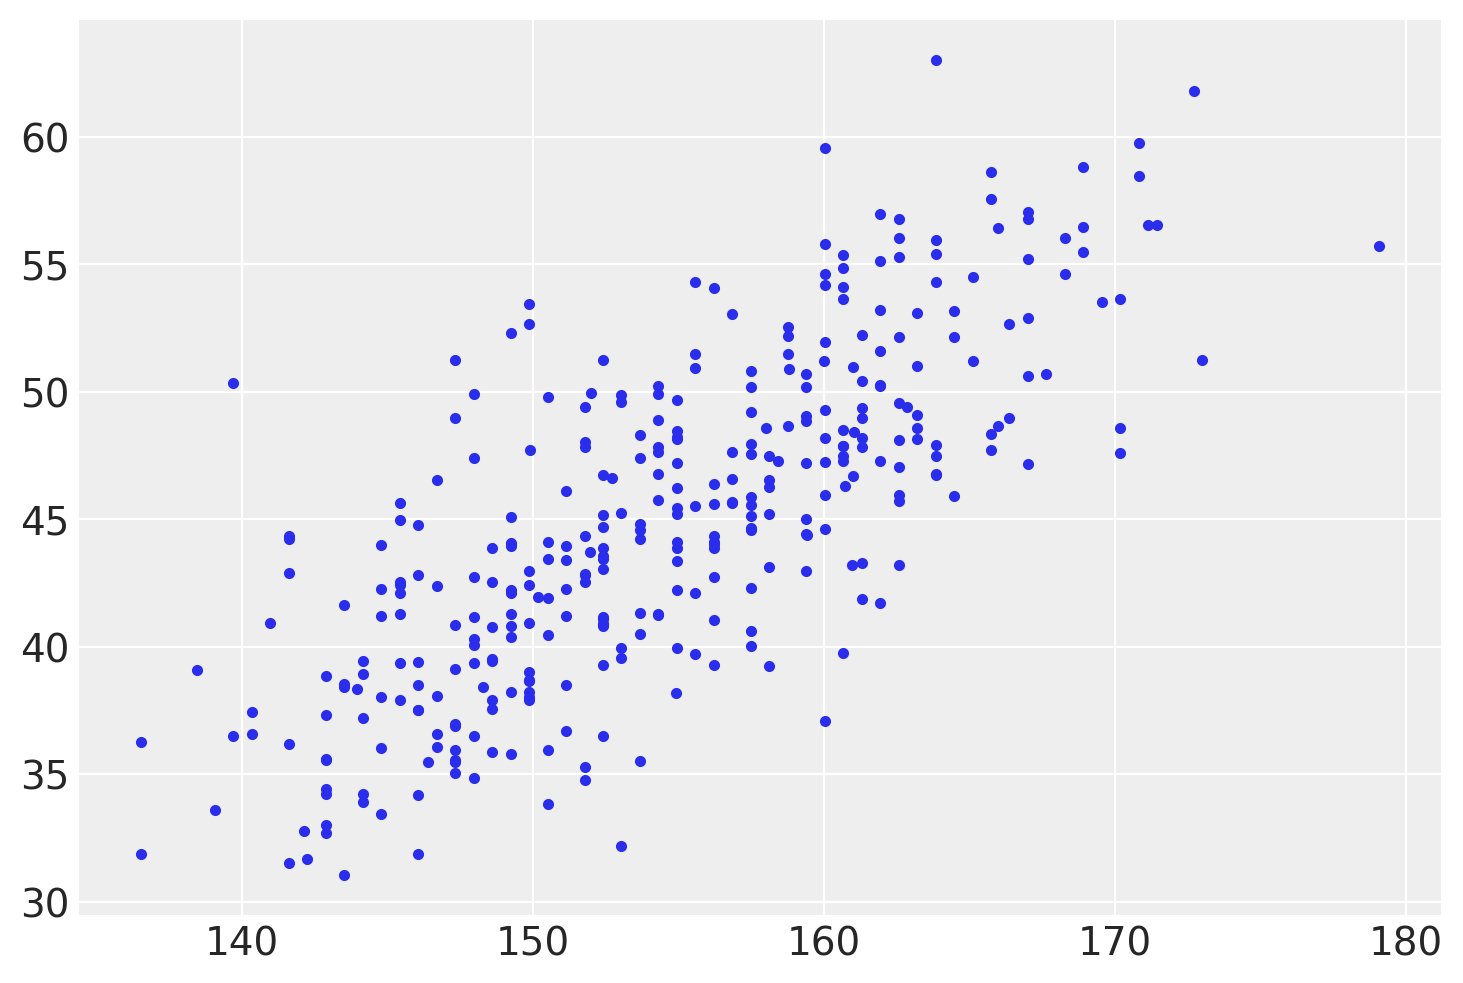

In [41]:
plt.plot(d2.height, d2.weight, ".");

#### Code 4.38

In [44]:
np.random.seed(2971)
N = 100  # 100 lines
a = stats.norm.rvs(178, 20, N)
b = stats.norm.rvs(0, 10, N)

#### Code 4.39 and 4.40

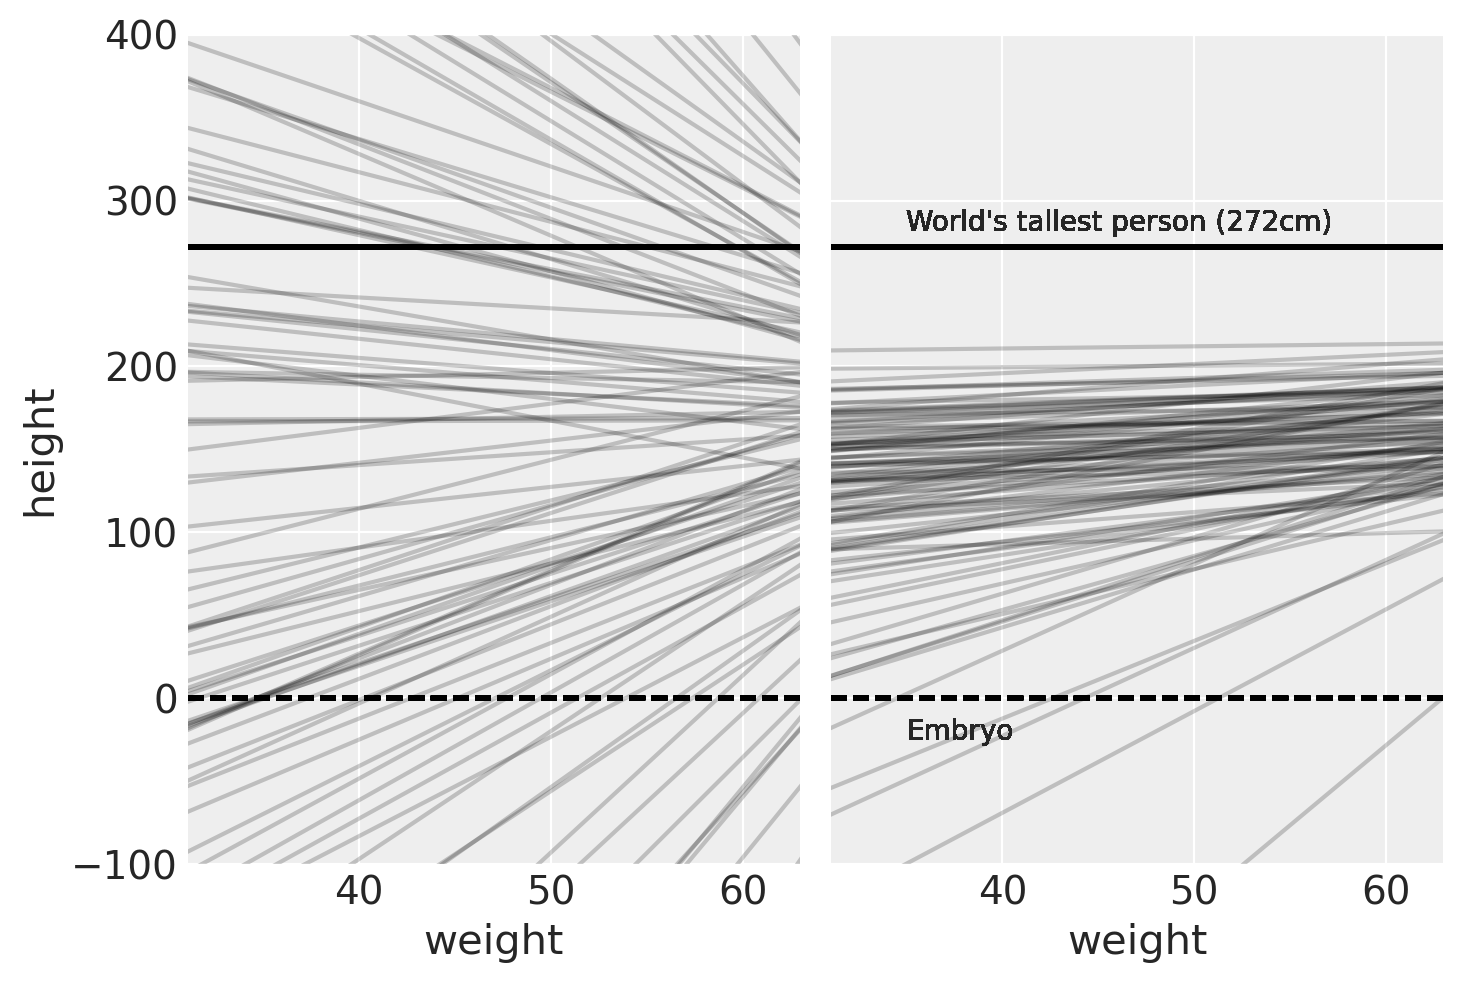

In [45]:
_, ax = plt.subplots(1, 2, sharey=True)
xbar = d2.weight.mean()
for i in range(N):
    ax[0].plot(a[i] + b[i] * (x - xbar), "k", alpha=0.2)
    ax[0].set_xlim(d2.weight.min(), d2.weight.max())
    ax[0].set_ylim(-100, 400)
    ax[0].axhline(0, c="k", ls="--")
    ax[0].axhline(272, c="k")
    ax[0].set_xlabel("weight")
    ax[0].set_ylabel("height")

b = stats.lognorm.rvs(s=1, scale=1, size=100)
for i in range(N):
    ax[1].plot(a[i] + b[i] * (x - xbar), "k", alpha=0.2)
    ax[1].set_xlim(d2.weight.min(), d2.weight.max())
    ax[1].set_ylim(-100, 400)
    ax[1].axhline(0, c="k", ls="--", label="embryo")
    ax[1].axhline(272, c="k")
    ax[1].set_xlabel("weight")
    ax[1].text(x=35, y=282, s="World's tallest person (272cm)")
    ax[1].text(x=35, y=-25, s="Embryo");

#### Code 4.42

In [46]:
with pm.Model() as m4_3:
    a = pm.Normal("a", mu=178, sd=20)
    b = pm.Lognormal("b", mu=0, sd=1)
    sigma = pm.Uniform("sigma", 0, 50)
    mu = a + b * (d2.weight - xbar)
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d2.height)
    trace_4_3 = pm.sample(1000, tune=1000)

/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, b, a]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 12 seconds.


In [47]:
with pm.Model() as m4_3b:
    a = pm.Normal("a", mu=178, sd=20)
    b = pm.Normal("b", mu=0, sd=1)
    sigma = pm.Uniform("sigma", 0, 50)
    mu = a + np.exp(b) * (d2.weight - xbar)
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d2.height)
    trace_4_3b = pm.sample(1000, tune=1000)

/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, b, a]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 7 seconds.


#### Code 4.44

In [48]:
az.summary(trace_4_3, kind="stats")

/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_5.5%  hdi_94.5%
a      154.608  0.278   154.129    155.033
b        0.903  0.042     0.832      0.965
sigma    5.100  0.196     4.788      5.404

#### Code 4.45

In [49]:
trace_4_3_df = pm.trace_to_dataframe(trace_4_3)
trace_4_3_df.cov().round(3)

a      b  sigma
a      0.077 -0.000 -0.001
b     -0.000  0.002  0.000
sigma -0.001  0.000  0.039

#### Code 4.46

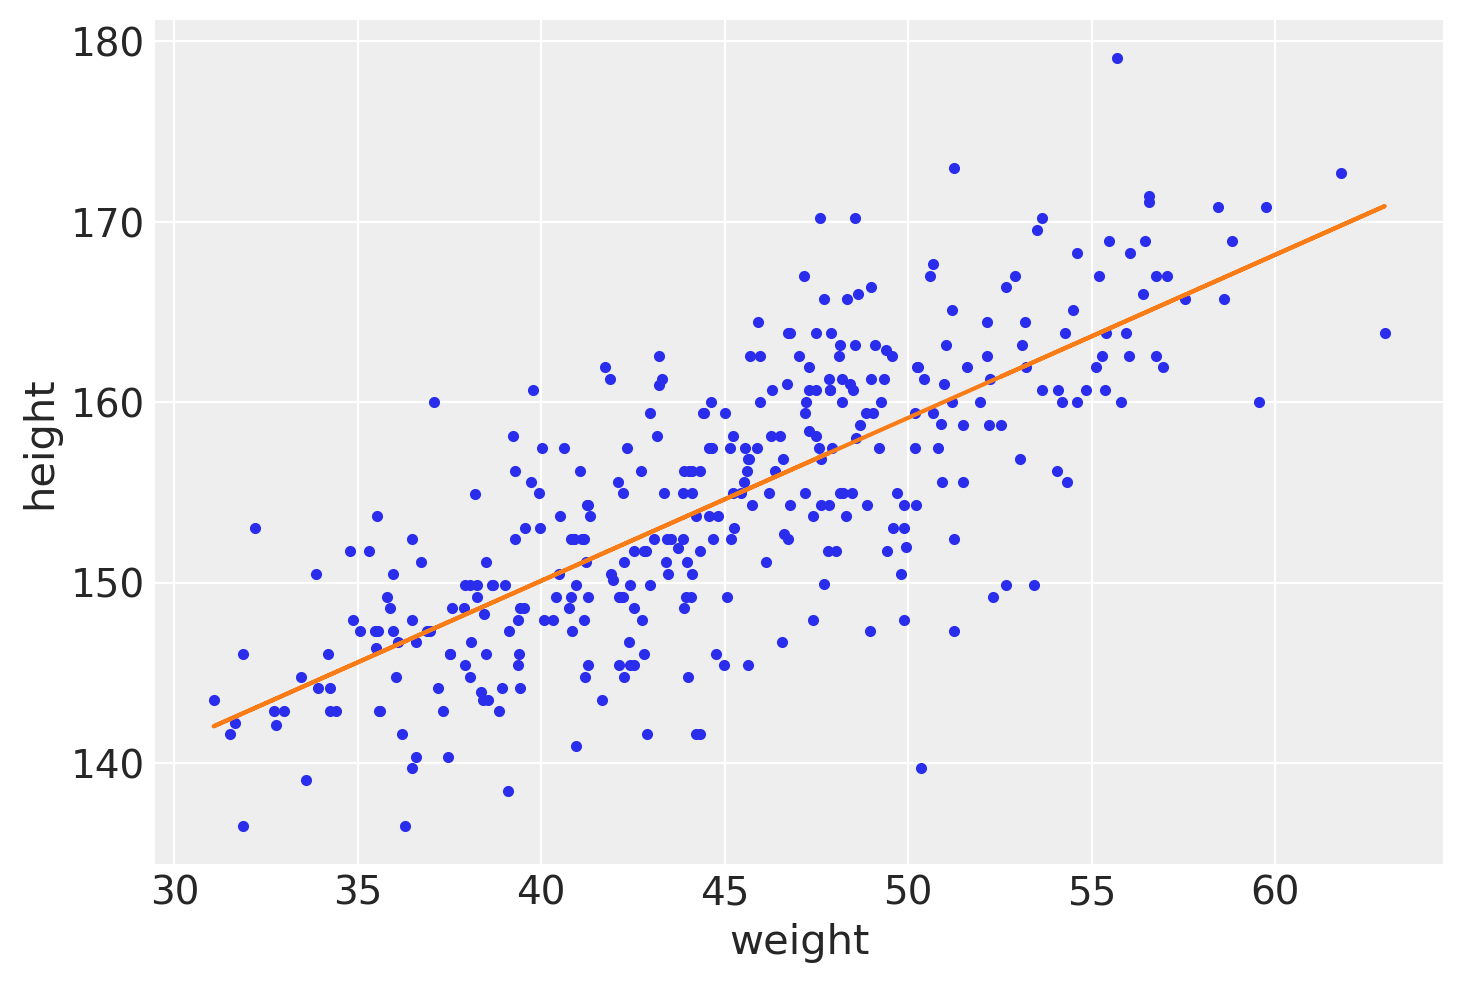

In [50]:
plt.plot(d2.weight, d2.height, ".")
plt.plot(d2.weight, trace_4_3["a"].mean() + trace_4_3["b"].mean() * (d2.weight - xbar))
plt.xlabel(d2.columns[1])
plt.ylabel(d2.columns[0]);

#### Code 4.47

In [51]:
trace_4_3_df.head(5)

a         b     sigma
0  154.580467  0.937009  5.319429
1  154.254391  0.915570  4.995528
2  154.944517  0.887035  4.885638
3  154.426672  0.946062  5.330151
4  154.887364  0.886078  4.953181

#### Code 4.48

In [54]:
N = [10, 50, 150, 352][3]
dN = d2[:N]
with pm.Model() as m_N:
    a = pm.Normal("a", mu=178, sd=100)
    b = pm.Lognormal("b", mu=0, sd=1)
    sigma = pm.Uniform("sigma", 0, 50)
    mu = pm.Deterministic("mu", a + b * (dN.weight - dN.weight.mean()))
    height = pm.Normal("height", mu=mu, sd=sigma, observed=dN.height)
    trace_N = pm.sample(1000, tune=1000)

/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, b, a]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 8 seconds.


#### Code 4.49

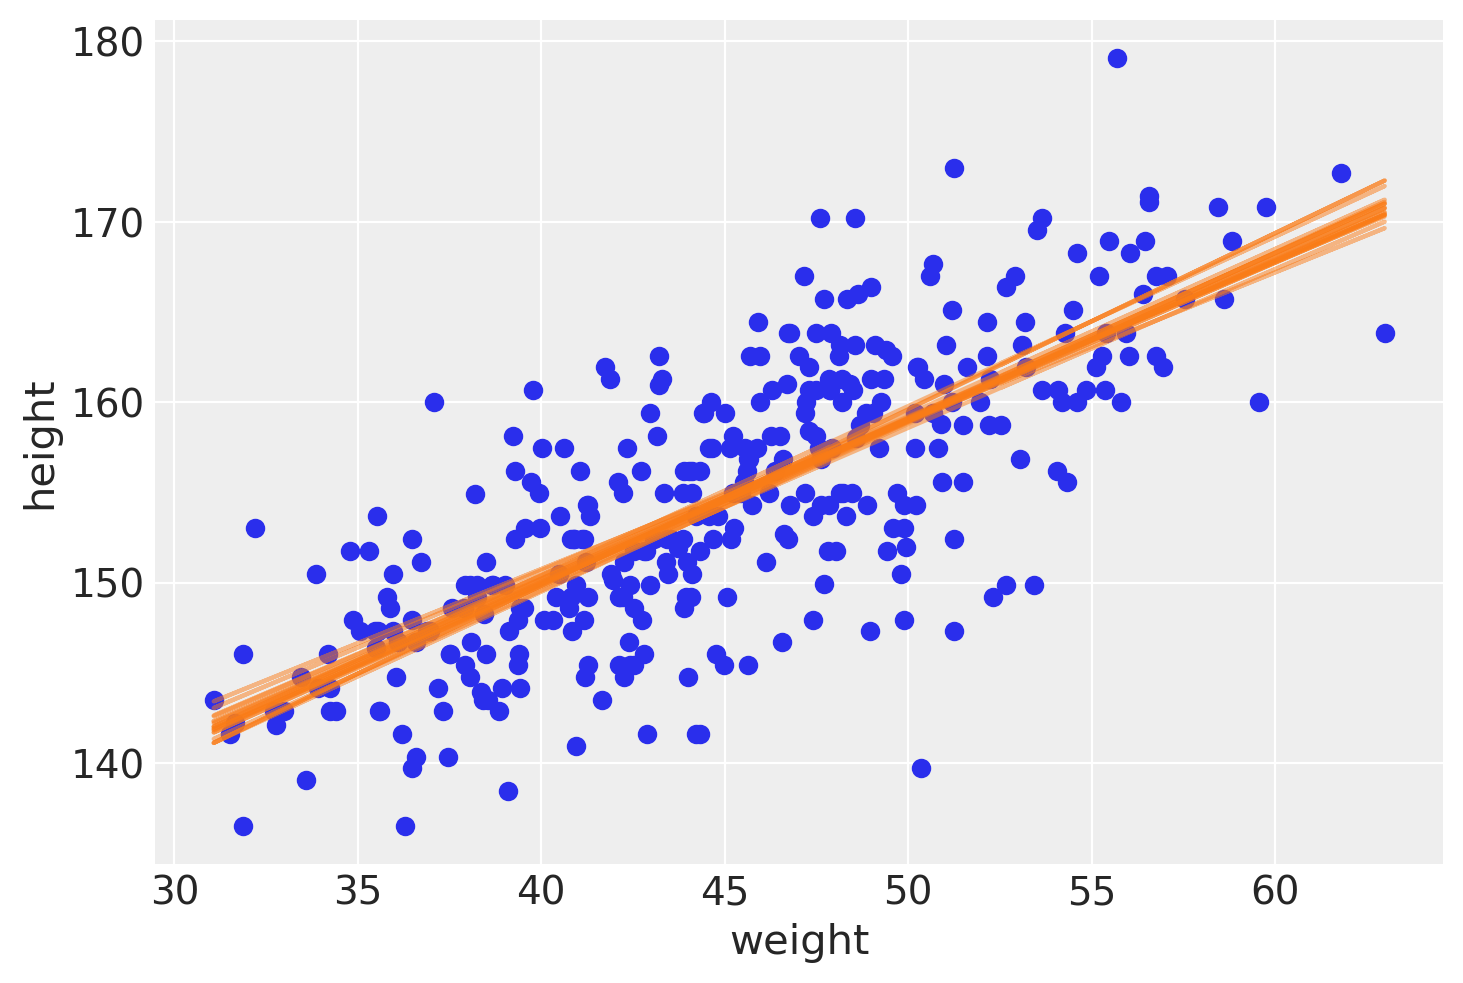

In [55]:
plt.plot(dN.weight, dN.height, "C0o")
idxs = np.random.randint(len(trace_N), size=20)
for idx in idxs:
    plt.plot(
        dN.weight,
        trace_N["a"][idx] + trace_N["b"][idx] * (dN.weight - dN.weight.mean()),
        "C1-",
        alpha=0.5,
    )
plt.xlabel(d2.columns[1])
plt.ylabel(d2.columns[0]);

Alternative we can directly use the deterministic `mu` variable

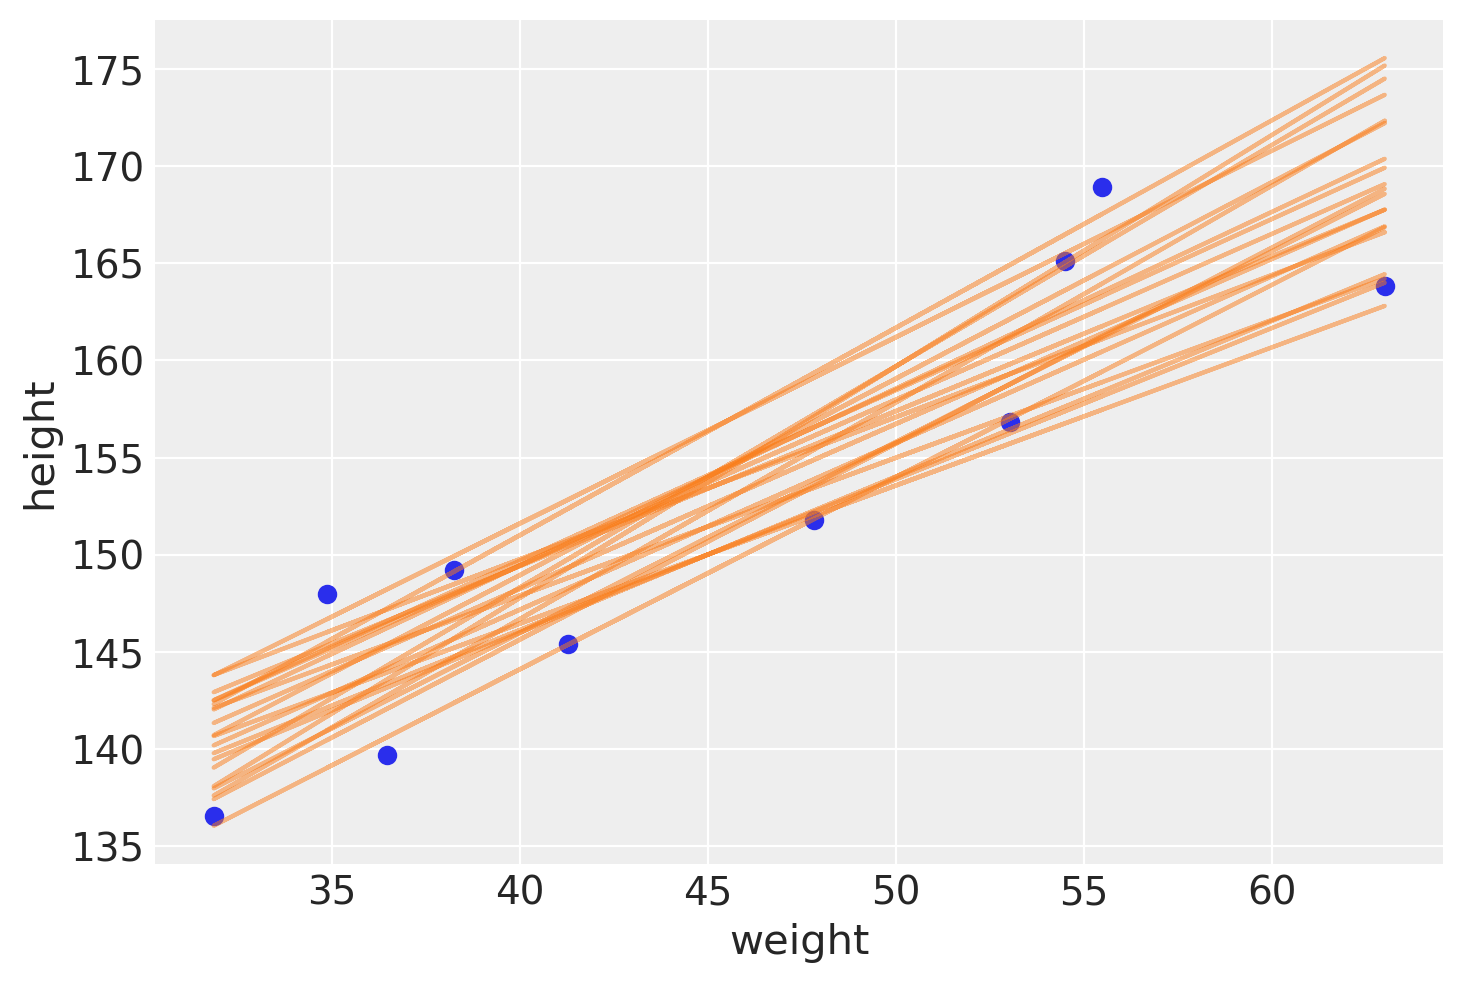

In [52]:
plt.plot(dN.weight, dN.height, "C0o")
for idx in idxs:
    plt.plot(d2.weight[:N], trace_N["mu"][idx], "C1-", alpha=0.5)
plt.xlabel(d2.columns[1])
plt.ylabel(d2.columns[0]);

#### 4.4.3.4. Plotting regression intervals and contours

Intervals can be more useful for **addressing uncertainty**.

#### Code 4.50

Starting with a single point on the x axis. We pick a point (`weight`) in this case, and sample a lot from the posterior.

In [56]:
mu_at_50 = trace_4_3["a"] + trace_4_3["b"] * (50 - d2.weight.mean())

In [57]:
mu_at_50

array([159.27442651, 158.84095194, 159.38813035, ..., 159.18521121,
       159.29809963, 159.57737239])

Then we can use this vector to plot histogram (below). This shows the distribution.

#### Code 4.51

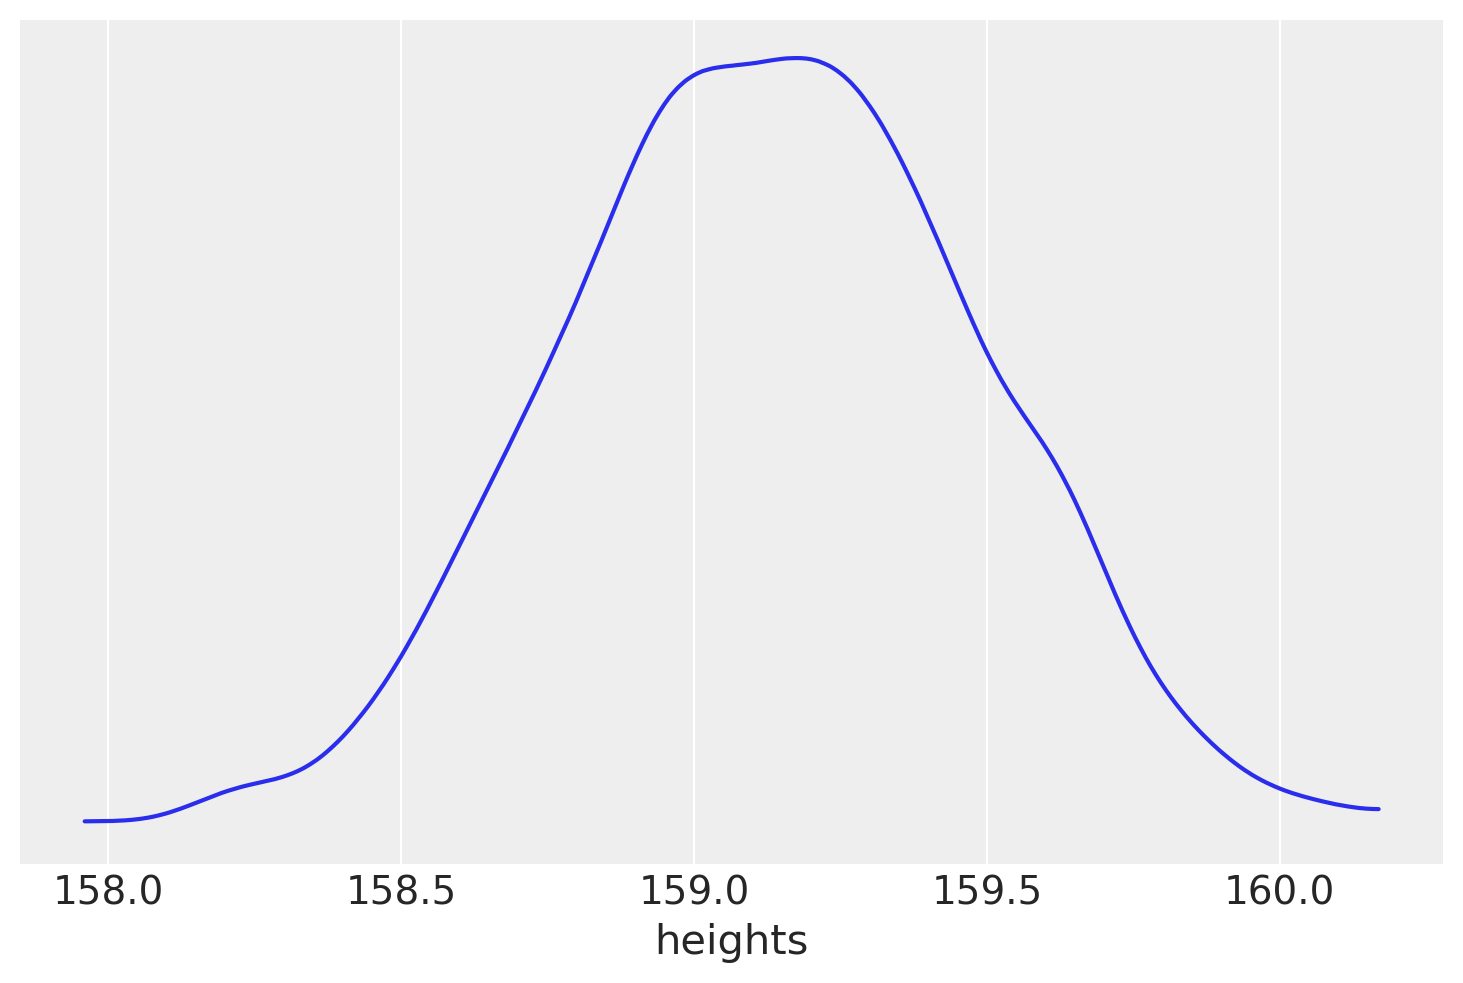

In [58]:
az.plot_kde(mu_at_50)
plt.xlabel("heights")
plt.yticks([]);

#### Code 4.52

Using the highest density interval (HDI) funciton, we can calculate HDI of central region *(default: 89%)*.

In [59]:
az.hdi(mu_at_50)

array([158.59662007, 159.68988751])

In [62]:
az.hdi(mu_at_50, hdi_prob=0.89)

array([158.59662007, 159.68988751])

Now we can repeat the whole thing for the entire points on the x axis.

#### Code 4.53 and 4.54

We are doing _manually_, in the book is done using the ```link``` function. In the book on code 4.58 the following operations are performed _manually_.

In [63]:
weight_seq = np.arange(25, 71)
# Given that we have a lot of samples we can use less of them for plotting (or we can use all!)
trace_4_3_thinned = trace_4_3[::10]
mu_pred = np.zeros((len(weight_seq), len(trace_4_3_thinned) * trace_4_3.nchains))
for i, w in enumerate(weight_seq):
    mu_pred[i] = trace_4_3_thinned["a"] + trace_4_3_thinned["b"] * (w - d2.weight.mean())

In [66]:
mu_pred.shape

(46, 200)

Each pile of dots on the x axis is Gaussian.

#### Code 4.55

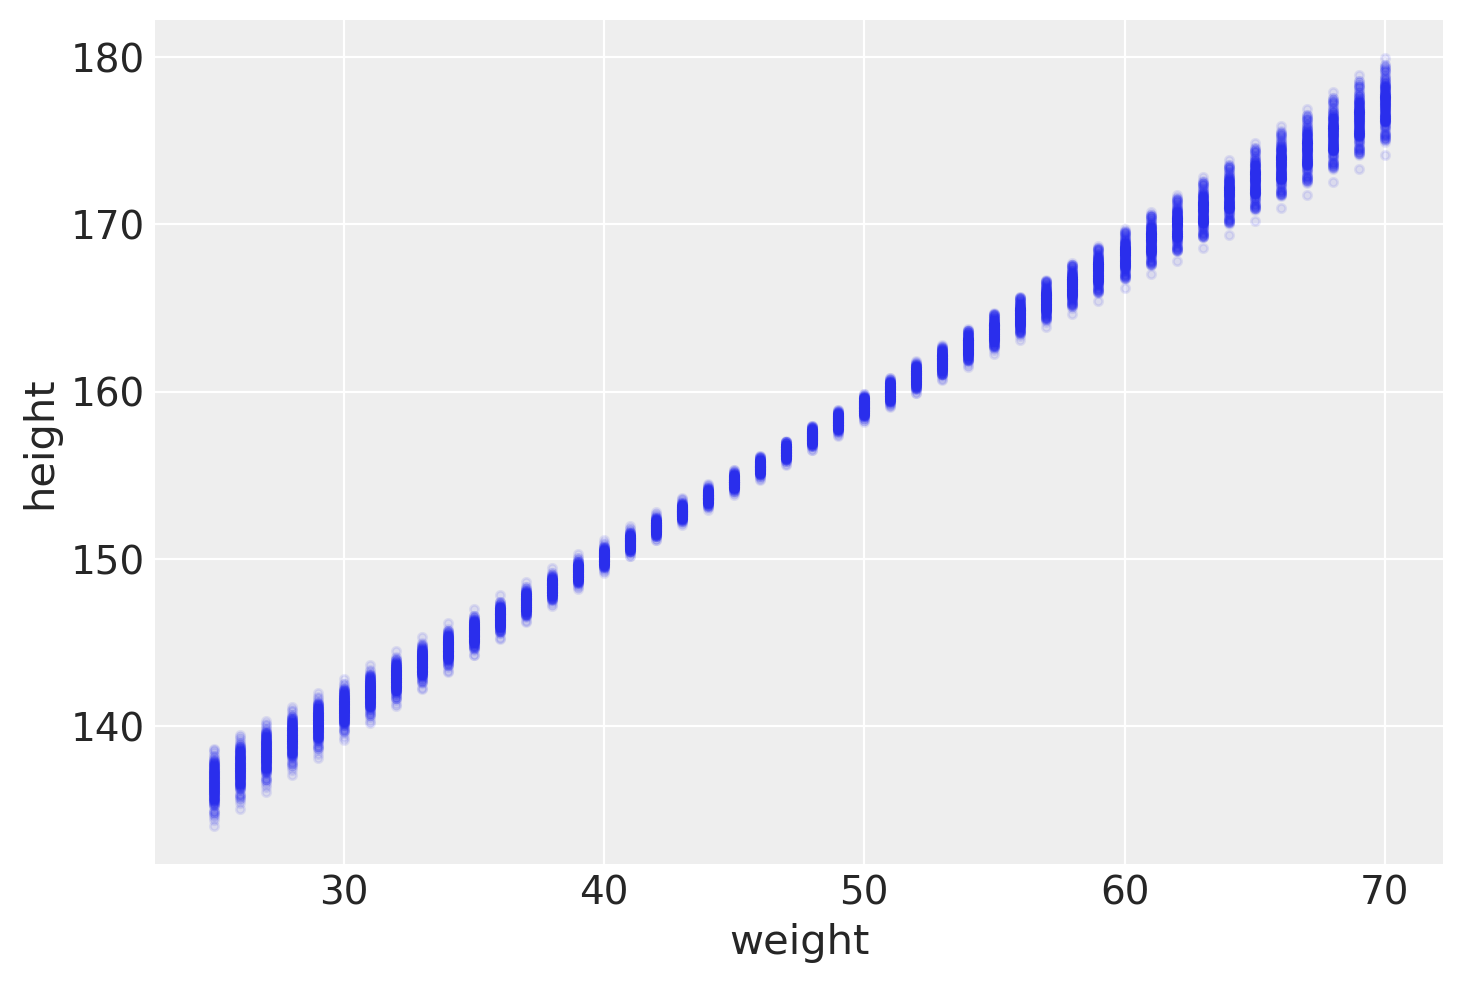

In [64]:
plt.plot(weight_seq, mu_pred, "C0.", alpha=0.1)
plt.xlabel("weight")
plt.ylabel("height");

#### Code 4.56

This time, we want to plot this w/ raw data.

Note that we're doing transposition for `mu_pred`. Its dimension is (46, 200). The first dimension should be the one we want to average over (samples). Thus, we need to transpose and make it to (200, 46). Same for `mu_pred.mean(axis)`. We want to average over axis=1 for `mu_pred` so that we end up with 46 samples.

In [86]:
mu_pred.shape

(46, 200)

In [93]:
mu_mean = mu_pred.mean(1)
mu_hdi = az.hdi(mu_pred.T)

#### Code 4.57

By default, `az.plot_hdi` plot central 89% HDI.

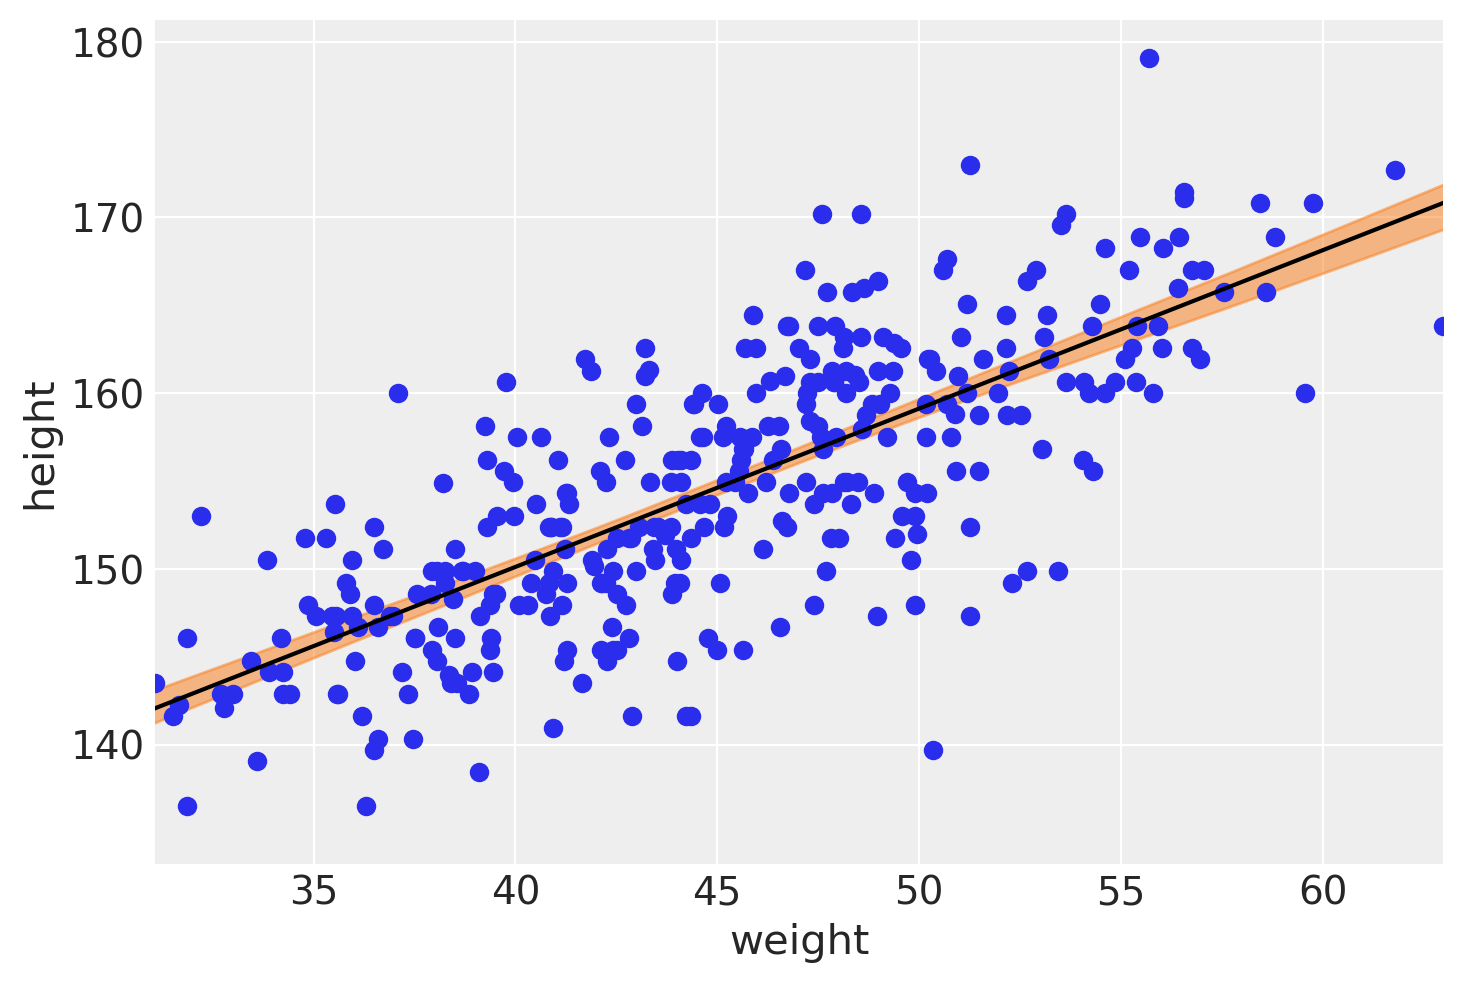

In [94]:
az.plot_hdi(weight_seq, mu_pred.T)
plt.scatter(d2.weight, d2.height)
plt.plot(weight_seq, mu_mean, "k")
plt.xlabel("weight")
plt.ylabel("height")
plt.xlim(d2.weight.min(), d2.weight.max());

**Recipe for generationg predictions and intervals from the posterior of a fit model**
1. Use `link` to generate distributions of posterior values for $\mu$. Make sure we pass a list of new horizontal axis values that we want to plot posterior predictions across.
2. Use summary functions like `mean()` or `az.hdi()` to find averages and lower and upper bounds of $\mu$ for each value of the predictor variable.
3. Finally, use plotting functions like `az.plot_hdi()`. Or we can do other things.

<font color='red'><b>Overconfident intervals</b></font>

The interval is very tight, meaning theat there's very little uncertainty. But these inferences are always conditional **on the model**. Meaning, **even a bad model can be very confident**. So what that interval means is: **Conditional on the assumption that height and weight are related by a straight line, then this is the most plausible line, and these are its plausible bounds**.

#### 4.4.3.5. !!! Prediction intervals

What we've done before is just use samples from the posterior to visualize the uncertainty in $\mu_{i}$, the linear model of the mean. **We shouldn't forget that we have this Gaussian: $$h_{i} \sim \text{Normal}(\mu_{i}, \sigma)$$**. So there's additional step where we need to take into account uncertainty w/ $\sigma$.

How it works
1. For any unique weight value (x axis values), sample from a Gaussian distribution w/ the correct mean for that weight, using the correct valur of sigma sampled from the sample posterior distribution.
2. Do this for every sample from the posterior, for every wieght value of interest -> a collection of simulated heights that 
    - has uncertainty in the posterior
    - also has uncertainty in the Gaussian distribution of heights.

#### Code 4.59

Now we are going to use ```sample_posterior_predictive()``` from PyCM3. This function gives us posterior predictive samples, that is for each value of the input variable we get a sample (from the posterior) of the output variable. Thus in the following example the shape of `height_pred['height'].shape is (200, 352)`

In [96]:
height_pred = pm.sample_posterior_predictive(trace_4_3, 200, m4_3) # trace, sample, modelb

/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/pymc3/sampling.py:1688: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


`height_pred` has simulated heights.

In [99]:
height_pred['height'].shape

(200, 352)

#### Code 4.60

In [100]:
height_pred_hdi = az.hdi(height_pred["height"])

/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/stats/stats.py:457: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


In [102]:
height_pred_hdi.shape

(352, 2)

#### Code 4.61

We're plotting 4 things
1. Raw data (`plt.scatter`)
2. MAP line (`plt.plot(weight_seq, mu_mean)`)
3. HPDI region (`az.plot_hdi(weight_seq, mu_pred.T)`)
    - This means **the uncertainty around the regression line (so, mean)**.
4. PI region for simulated heights (`az.plot_hdi(d2.weight, height_pred["height"], ax=ax)`)
    - This means **what the model expects to find 89% of actual heights in the population, at each weight**.

/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/stats/stats.py:457: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


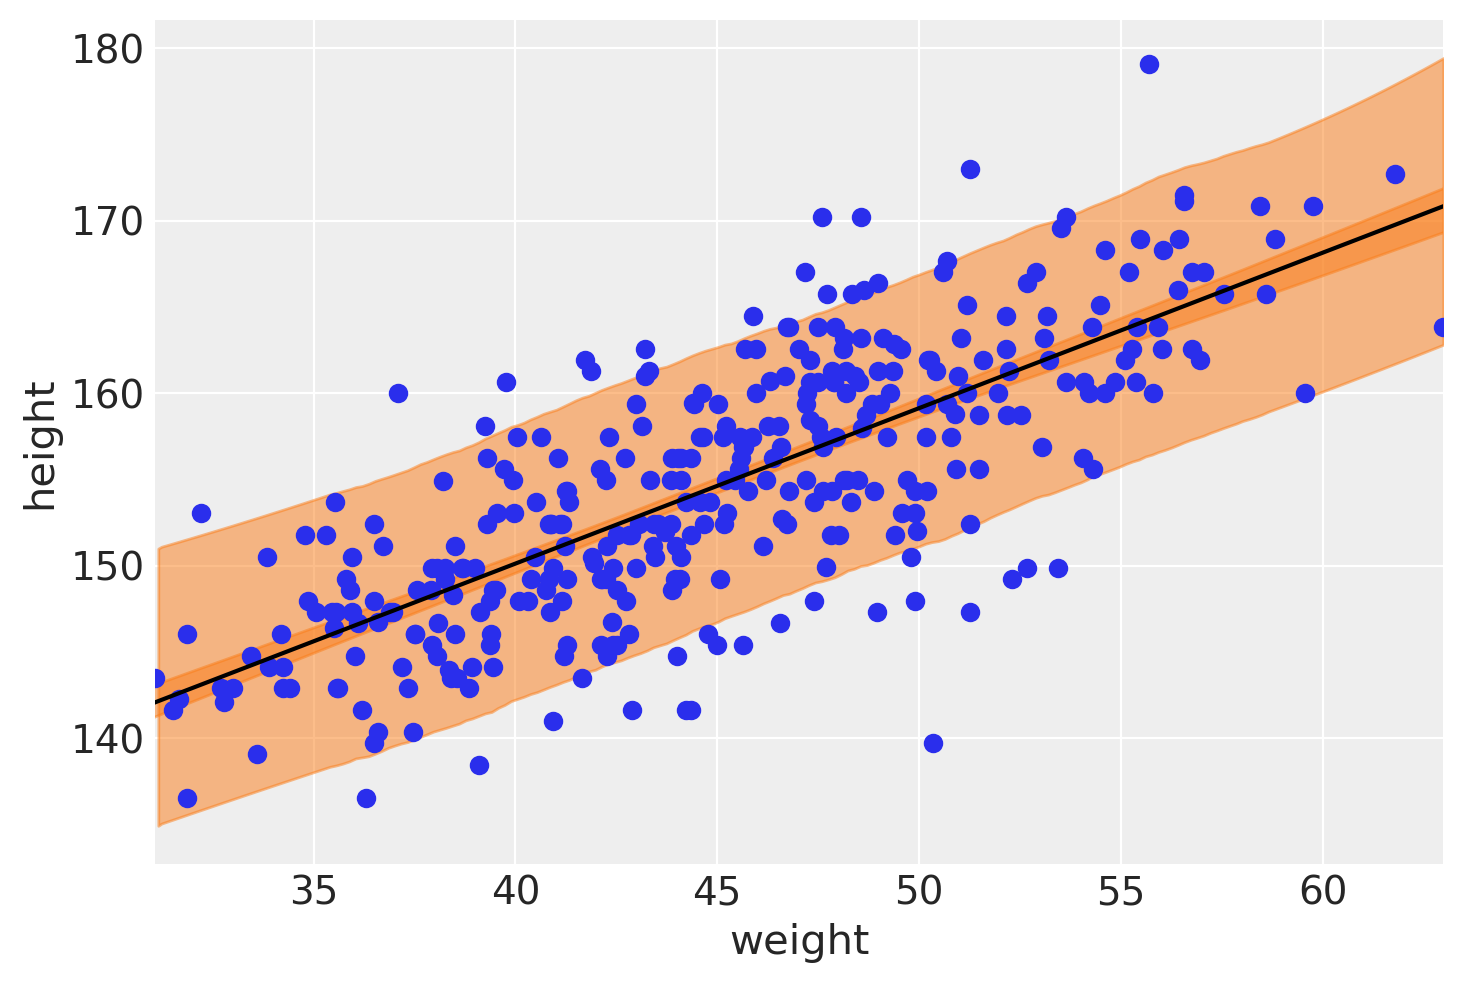

In [103]:
ax = az.plot_hdi(weight_seq, mu_pred.T)
az.plot_hdi(d2.weight, height_pred["height"], ax=ax)
plt.scatter(d2.weight, d2.height)
plt.plot(weight_seq, mu_mean, "k")
plt.xlabel("weight")
plt.ylabel("height")
plt.xlim(d2.weight.min(), d2.weight.max());

<font color='red'><b>Two kinds of uncertainty</b></font>

- Two kinds: uncertainty in *parameters* and in *a sampling process*.
- They are eventually blended together in the posterior predictive simulation.
- It's **important to keep them straight**, because they depend on different model assumptions.

#### Code 4.62

Change the number of samples used in 4.59 (200) to other values.

#### Code 4.63

Now we are going to generate heights from the posterior *manually*. Instead of restricting ourselves to the input values, we are going to pass an array of equally spaced weights values, called `weight_seg`.

1. Randomly choose a trace to get sampled $\alpha$, $\beta$, and $\sigma$.
2. For these samples, calculate mean (and get sigma) for every weight value.
3. Using this mean and sigma, draw height (single value).
4. Repeat N times (N=samples from the posterior)

In [104]:
weight_seq = np.arange(25, 71)
post_samples = []
for _ in range(1000):  # number of samples from the posterior
    i = np.random.randint(len(trace_4_3))
    mu_pr = trace_4_3["a"][i] + trace_4_3["b"][i] * (weight_seq - d2.weight.mean())
    sigma_pred = trace_4_3["sigma"][i]
    post_samples.append(np.random.normal(mu_pr, sigma_pred))

In [107]:
post_samples[0].shape

(46,)

/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/stats/stats.py:457: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(
/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/stats/stats.py:457: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


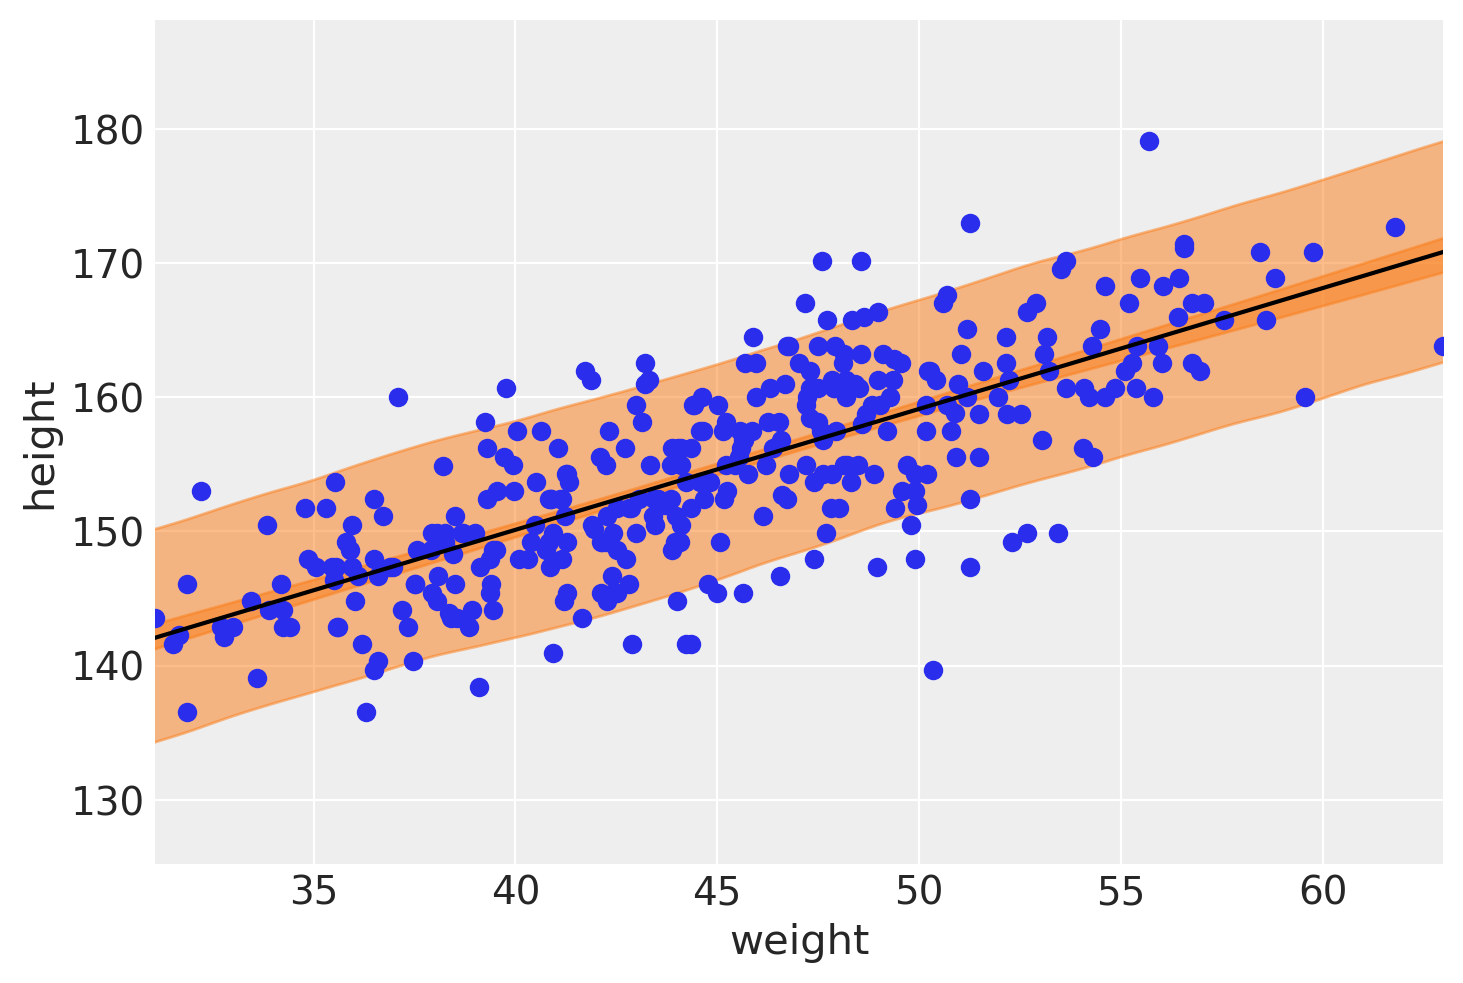

In [105]:
ax = az.plot_hdi(weight_seq, mu_pred.T)
az.plot_hdi(weight_seq, np.array(post_samples), ax=ax)
plt.scatter(d2.weight, d2.height)
plt.plot(weight_seq, mu_mean, "k")
plt.xlabel("weight")
plt.ylabel("height")
plt.xlim(d2.weight.min(), d2.weight.max());

## 4.5. Curves from lines

How to use linear regression to build curves:
1. **Polynominal regression**
2. **B-splines**

Both transform a single predictor into several synthetic variables.

### 4.5.1. Polynomial regression

#### Code 4.64

We have already loaded this dataset, check code 4.7 and 4.8.

In [113]:
d.head()

height     weight   age  male
0  151.765  47.825606  63.0     1
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
3  156.845  53.041914  41.0     1
4  145.415  41.276872  51.0     0

For polynomical models, it's important to **standardize** the predictior variable.

#### Code 4.65

Note that here, for $\beta_{2}$ the prior is normal, not log-normal. This is because we don't want a positive constraint.
- For $\beta_{1}$, we wanted log-normal because we want $\beta_{1}$ to be positive (height and weight have positive correlation).
- For $\beta_{2}$, it's unclear?

In [114]:
d["weight_std"] = (d.weight - d.weight.mean()) / d.weight.std()
d["weight_std2"] = d.weight_std ** 2

with pm.Model() as m_4_5:
    a = pm.Normal("a", mu=178, sd=100)
    b1 = pm.Lognormal("b1", mu=0, sd=1)
    b2 = pm.Normal("b2", mu=0, sd=1)
    sigma = pm.Uniform("sigma", lower=0, upper=50)
    mu = pm.Deterministic("mu", a + b1 * d.weight_std + b2 * d.weight_std2)
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d.height)
    trace_4_5 = pm.sample(1000, tune=1000)

/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, b2, b1, a]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 14 seconds.


In [118]:
trace_4_5.varnames

['a', 'b1_log__', 'b2', 'sigma_interval__', 'b1', 'sigma', 'mu']

/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


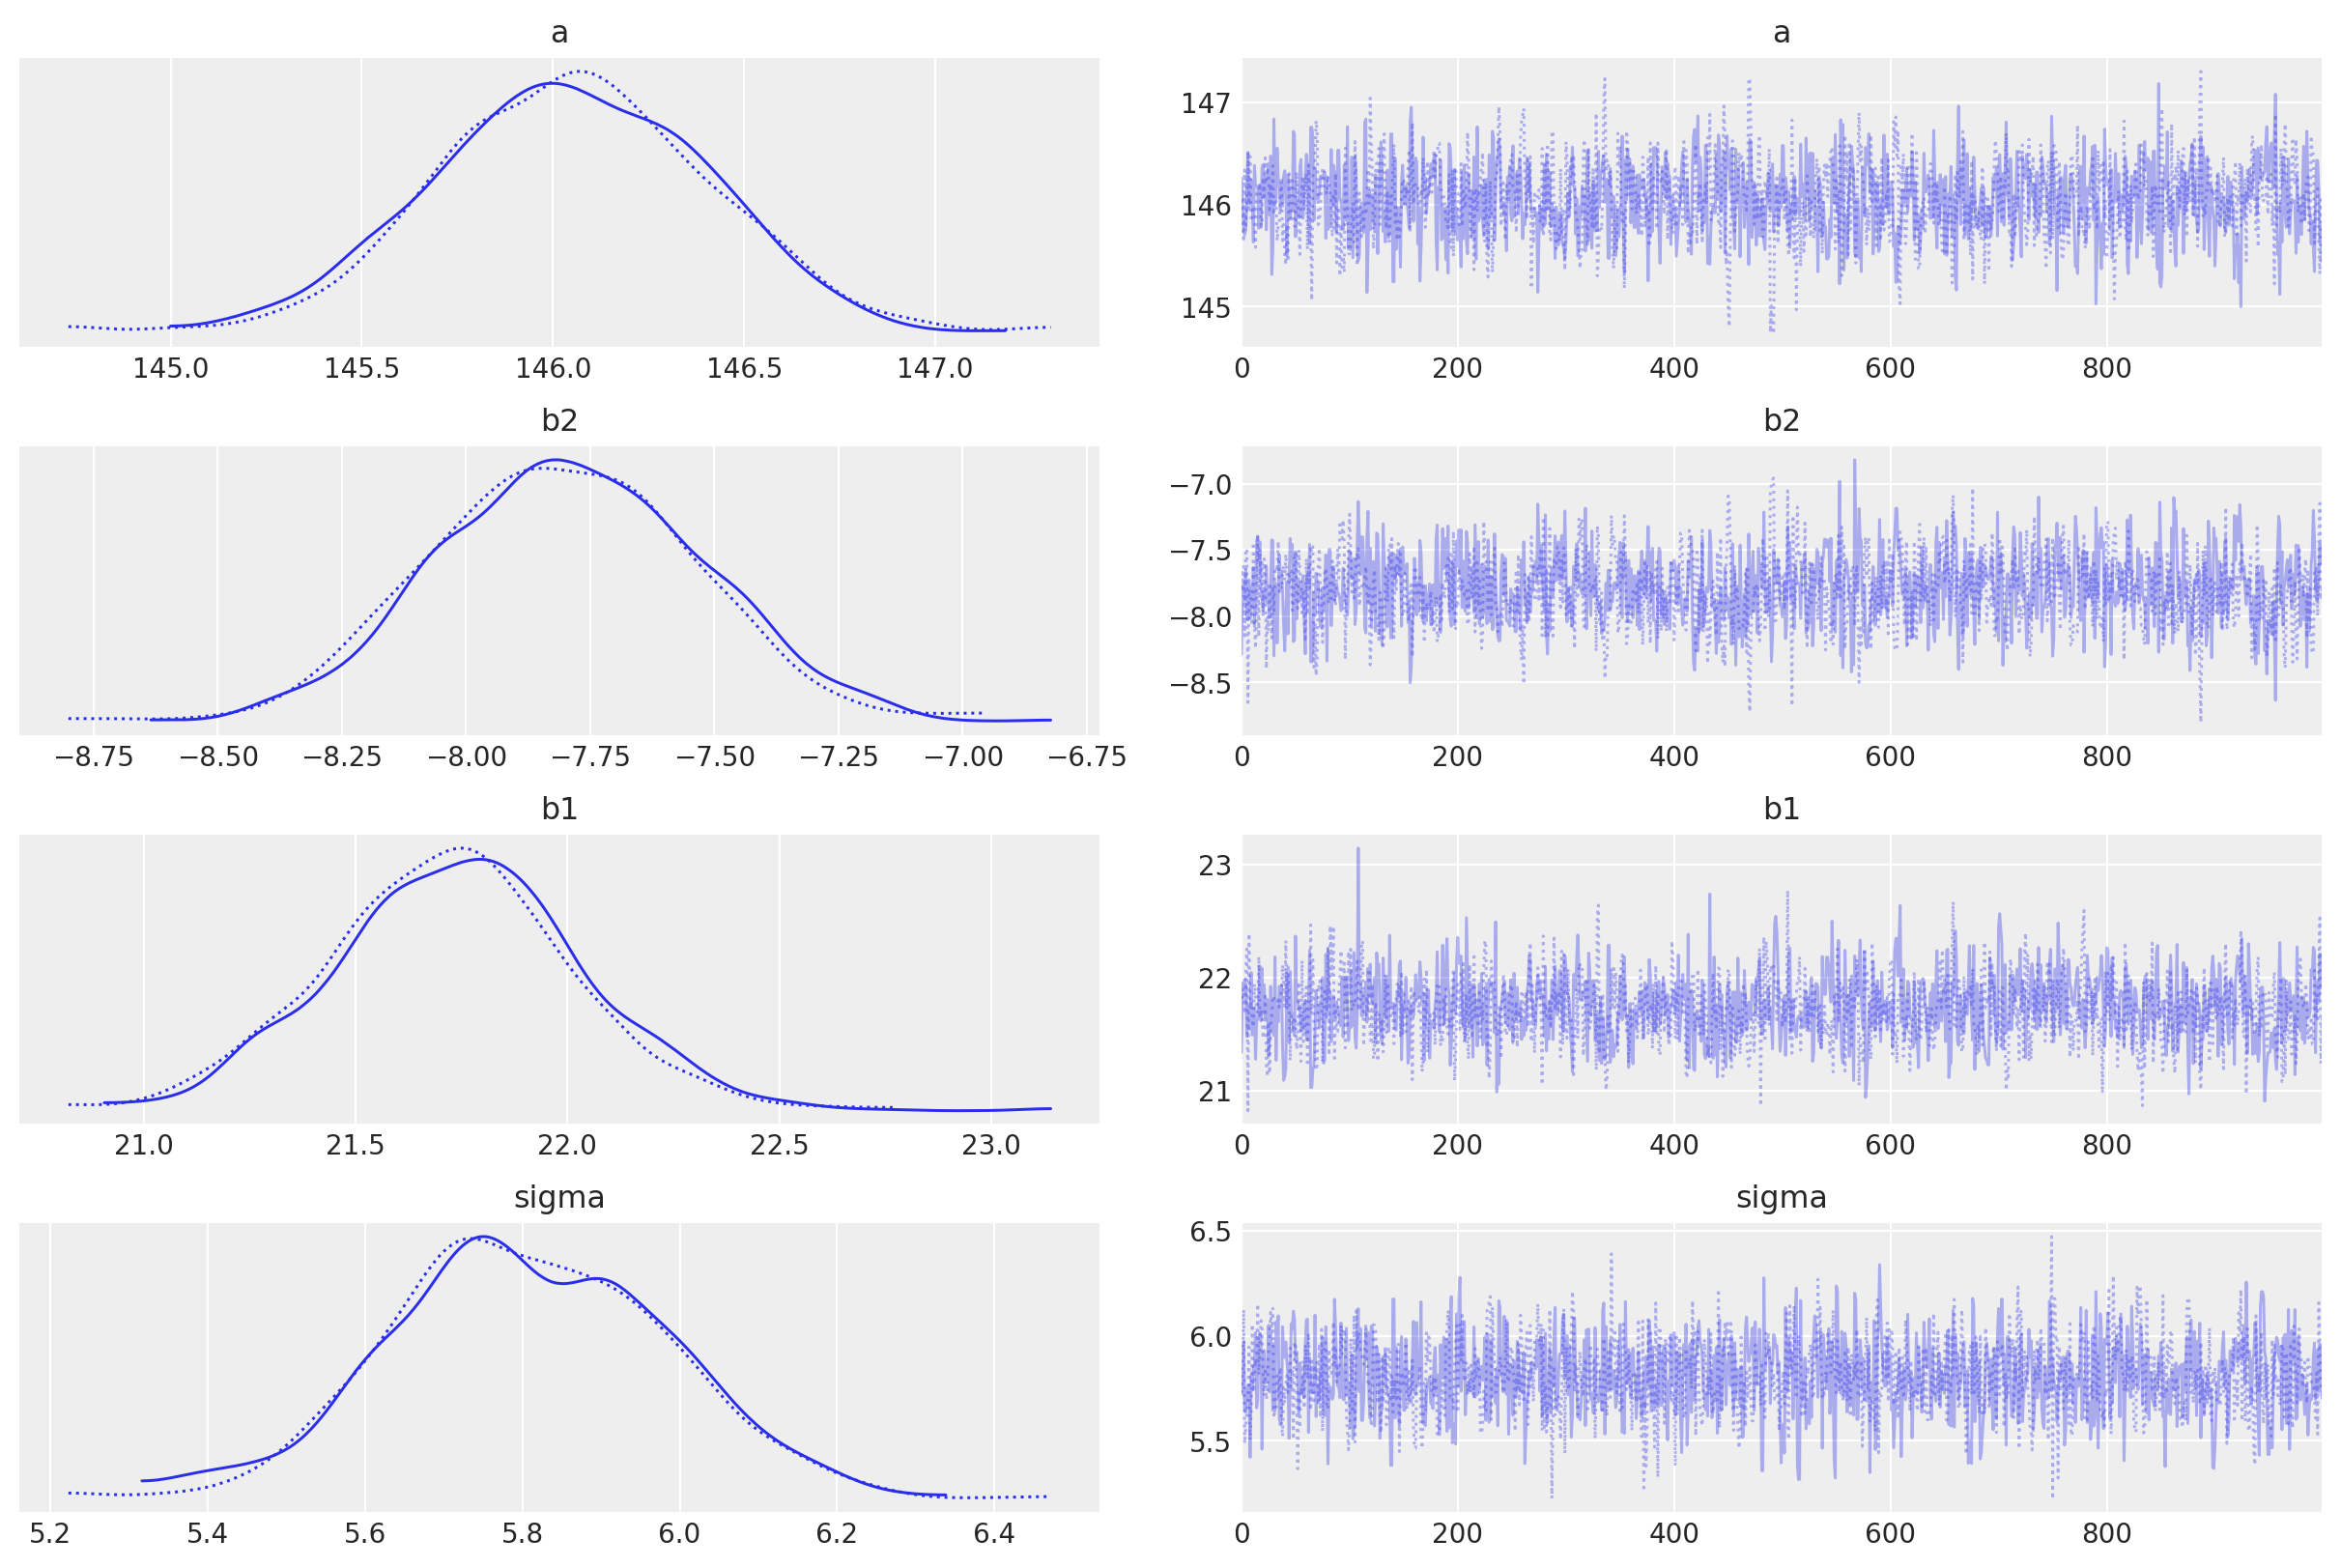

In [120]:
varnames = ["~mu"]
az.plot_trace(trace_4_5, varnames);

#### Code 4.66

In [121]:
az.summary(trace_4_5, varnames, kind="stats", round_to=2)

/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean    sd  hdi_5.5%  hdi_94.5%
a      146.05  0.36    145.49     146.60
b2      -7.80  0.27     -8.22      -7.40
b1      21.73  0.29     21.24      22.16
sigma    5.81  0.18      5.53       6.08

#### Code 4.67

In [122]:
mu_pred = trace_4_5["mu"]
height_pred = pm.sample_posterior_predictive(trace_4_5, 200, m_4_5)

/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/pymc3/sampling.py:1688: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


#### Code 4.68

/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/stats/stats.py:457: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(
/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/stats/stats.py:457: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


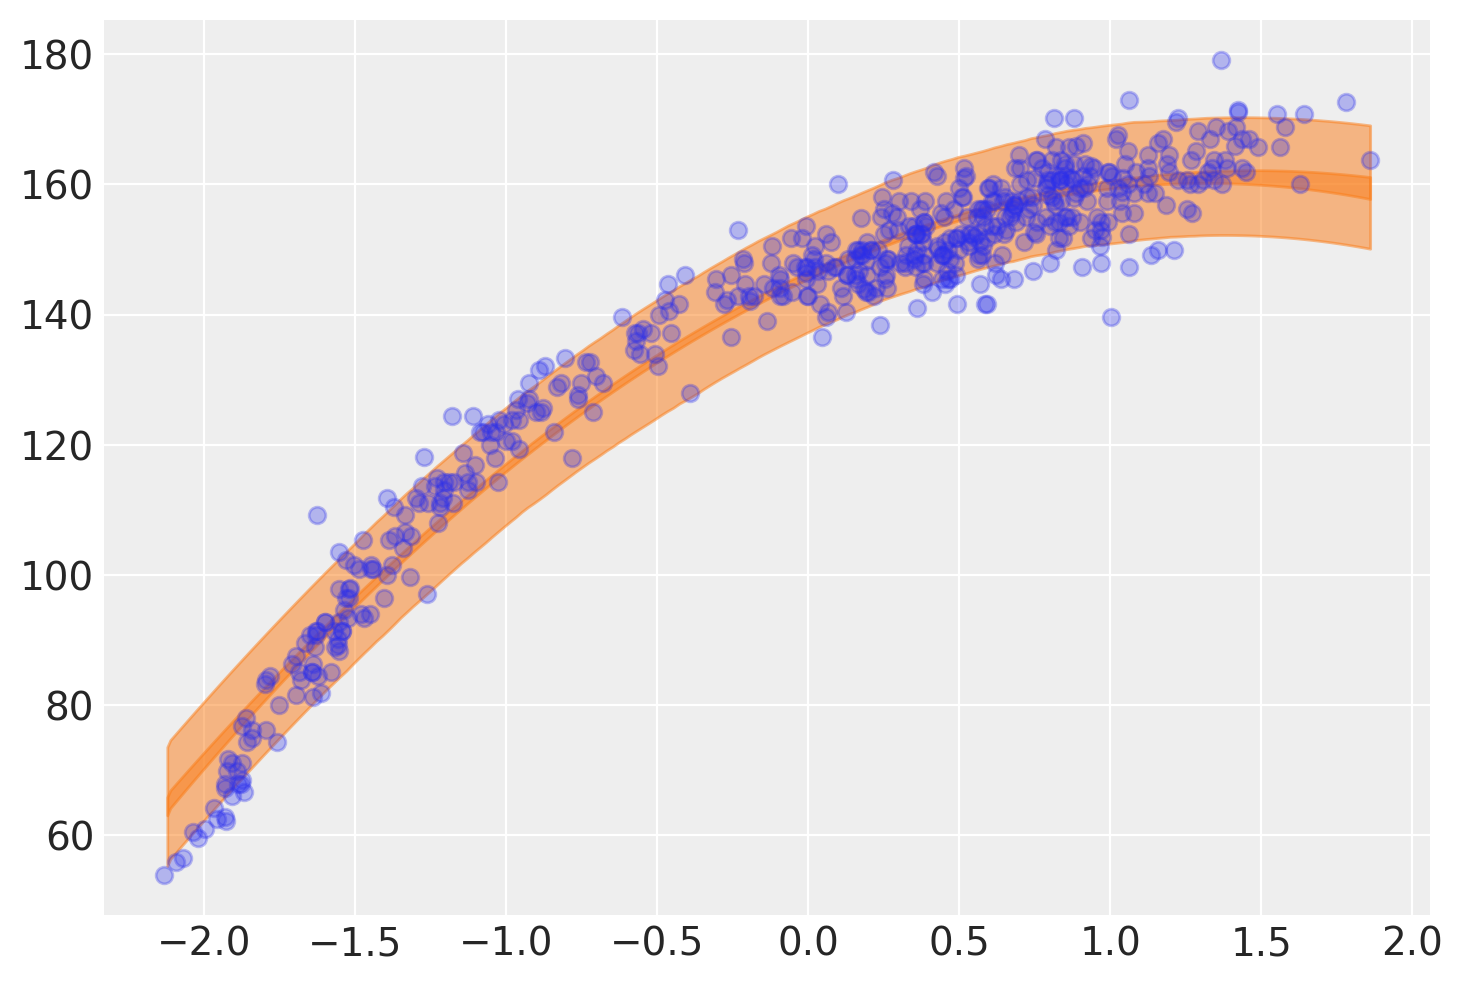

In [123]:
ax = az.plot_hdi(d.weight_std, mu_pred)
az.plot_hdi(d.weight_std, height_pred["height"], ax=ax)
plt.scatter(d.weight_std, d.height, c="C0", alpha=0.3)

<font color='red'><b>Nifty trick!! (see below)</b></font>

#### Code 4.69

We will stack the weights to get a 2D array, this simplifies writing a model. Now we can compute the dot product between beta and the 2D-array

In [125]:
weight_m = np.vstack((d.weight_std, d.weight_std ** 2, d.weight_std ** 3))

What's different from the book though is that now the prior of $\beta_{1}$ is just normal, not log-normal.

In [126]:
with pm.Model() as m_4_6:
    a = pm.Normal("a", mu=178, sd=100)
    b = pm.Normal("b", mu=0, sd=10, shape=3)
    sigma = pm.Uniform("sigma", lower=0, upper=50)
    mu = pm.Deterministic("mu", a + pm.math.dot(b, weight_m))
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d.height)
    trace_4_6 = pm.sample(1000, tune=1000)

/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, b, a]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 11 seconds.


#### Code 4.70 and 4.71

/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/pymc3/sampling.py:1688: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/stats/stats.py:457: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(
/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/stats/stats.py:457: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


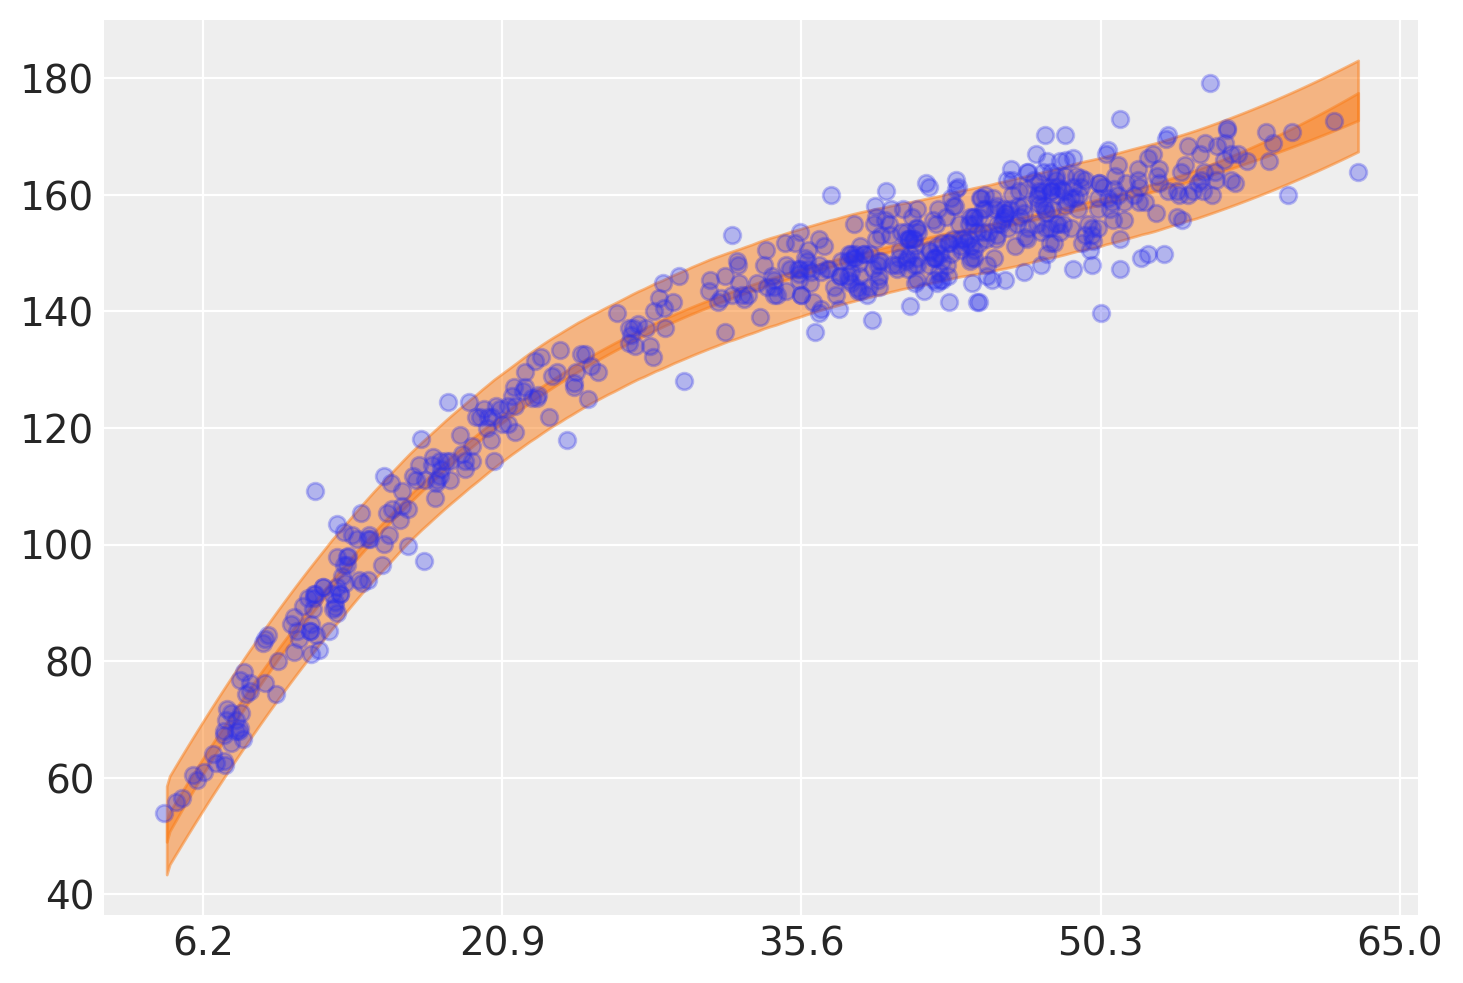

In [127]:
mu_pred = trace_4_6["mu"]
height_pred = pm.sample_posterior_predictive(trace_4_6, 200, m_4_6)

ax = az.plot_hdi(d.weight_std, mu_pred)
az.plot_hdi(d.weight_std, height_pred["height"], ax=ax)
plt.scatter(d.weight_std, d.height, c="C0", alpha=0.3)

at = np.arange(-2, 3)
plt.xticks(at, np.round(at * d.weight.std() + d.weight.mean(), 1));

### 4.5.2. Splines

B-Spline: "B" = Basis (means component)

#### Code 4.72

doy: day of blossom

In [128]:
d = pd.read_csv("Data/cherry_blossoms.csv")
# nans are not treated as in the book
az.summary(d.dropna().to_dict(orient="list"), kind="stats")

mean       sd  hdi_5.5%  hdi_94.5%
year        1533.395  291.123   1123.00    1978.00
doy          104.921    6.258     95.00     114.00
temp           6.100    0.683      5.00       7.13
temp_upper     6.938    0.812      5.57       7.98
temp_lower     5.264    0.762      4.12       6.40

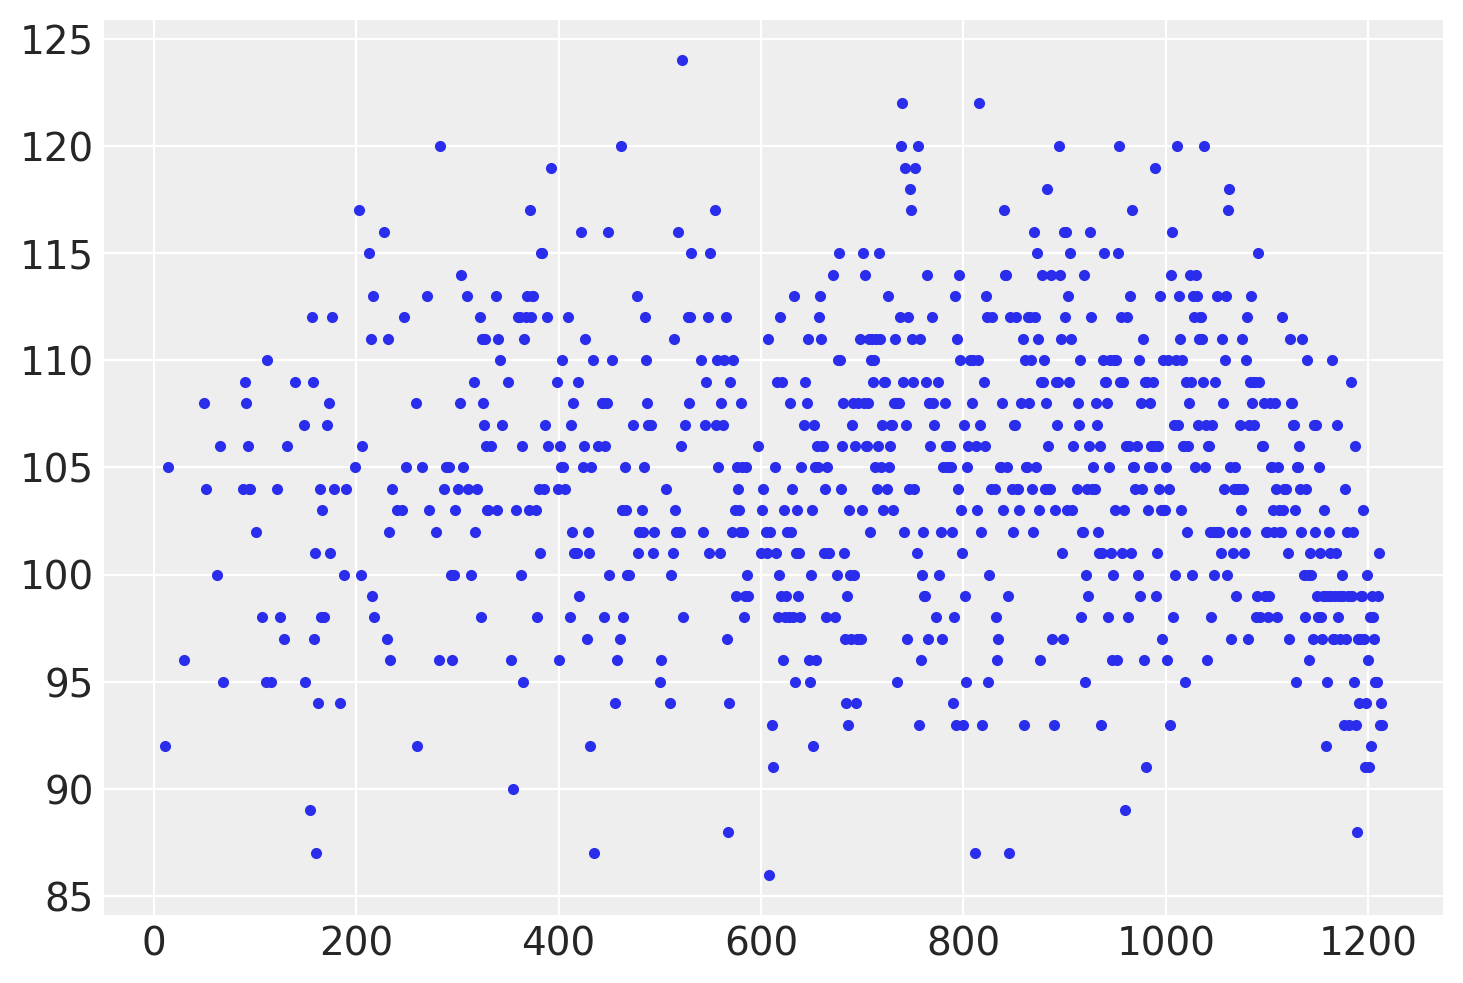

In [133]:
plt.plot(d.doy, '.')

The basic idea of B-spline: **divide the full range of some predictor into parts**
- Then we assign a parameter to each part and gradually turn it on and off.
- B-spline doesn't invent a new variable (like polynomial).

$$\mu_{i} = \alpha + w_{1}B_{i, 1} + w_{2}B_{i, 2} + w_{3}B_{i, 3} + \cdots $$
Here $B_{i, n}$ is the nth basis function's value on row i. So depending on the range of predictor, slopes can change.

More knots, more flexible. You can also mix this with polynomial.

#### Code 4.73

In [134]:
d2 = d.dropna(subset=["doy"])
num_knots = 15
knot_list = np.quantile(d2.year, np.linspace(0, 1, num_knots))

1. Knot location
    - Technically it can be anywhere you want. = location is part of the model.
    - Currently, we use evenly-spaced quantiles.

2. Polynomial degree
    - degree = 1: 2 basis functions combine at each point (linear)
    - degree = 3: 4 basis functions combine at each point (cubic)

#### Code 4.74

Here we will use patsy as a simple way of building the b-spline matrix. For more detail please read https://patsy.readthedocs.io/en/latest/spline-regression.html

In [136]:
from patsy import dmatrix

B = dmatrix(
    "bs(year, knots=knots, degree=3, include_intercept=True) - 1",
    {"year": d2.year.values, "knots": knot_list[1:-1]},
)

#### Code 4.75

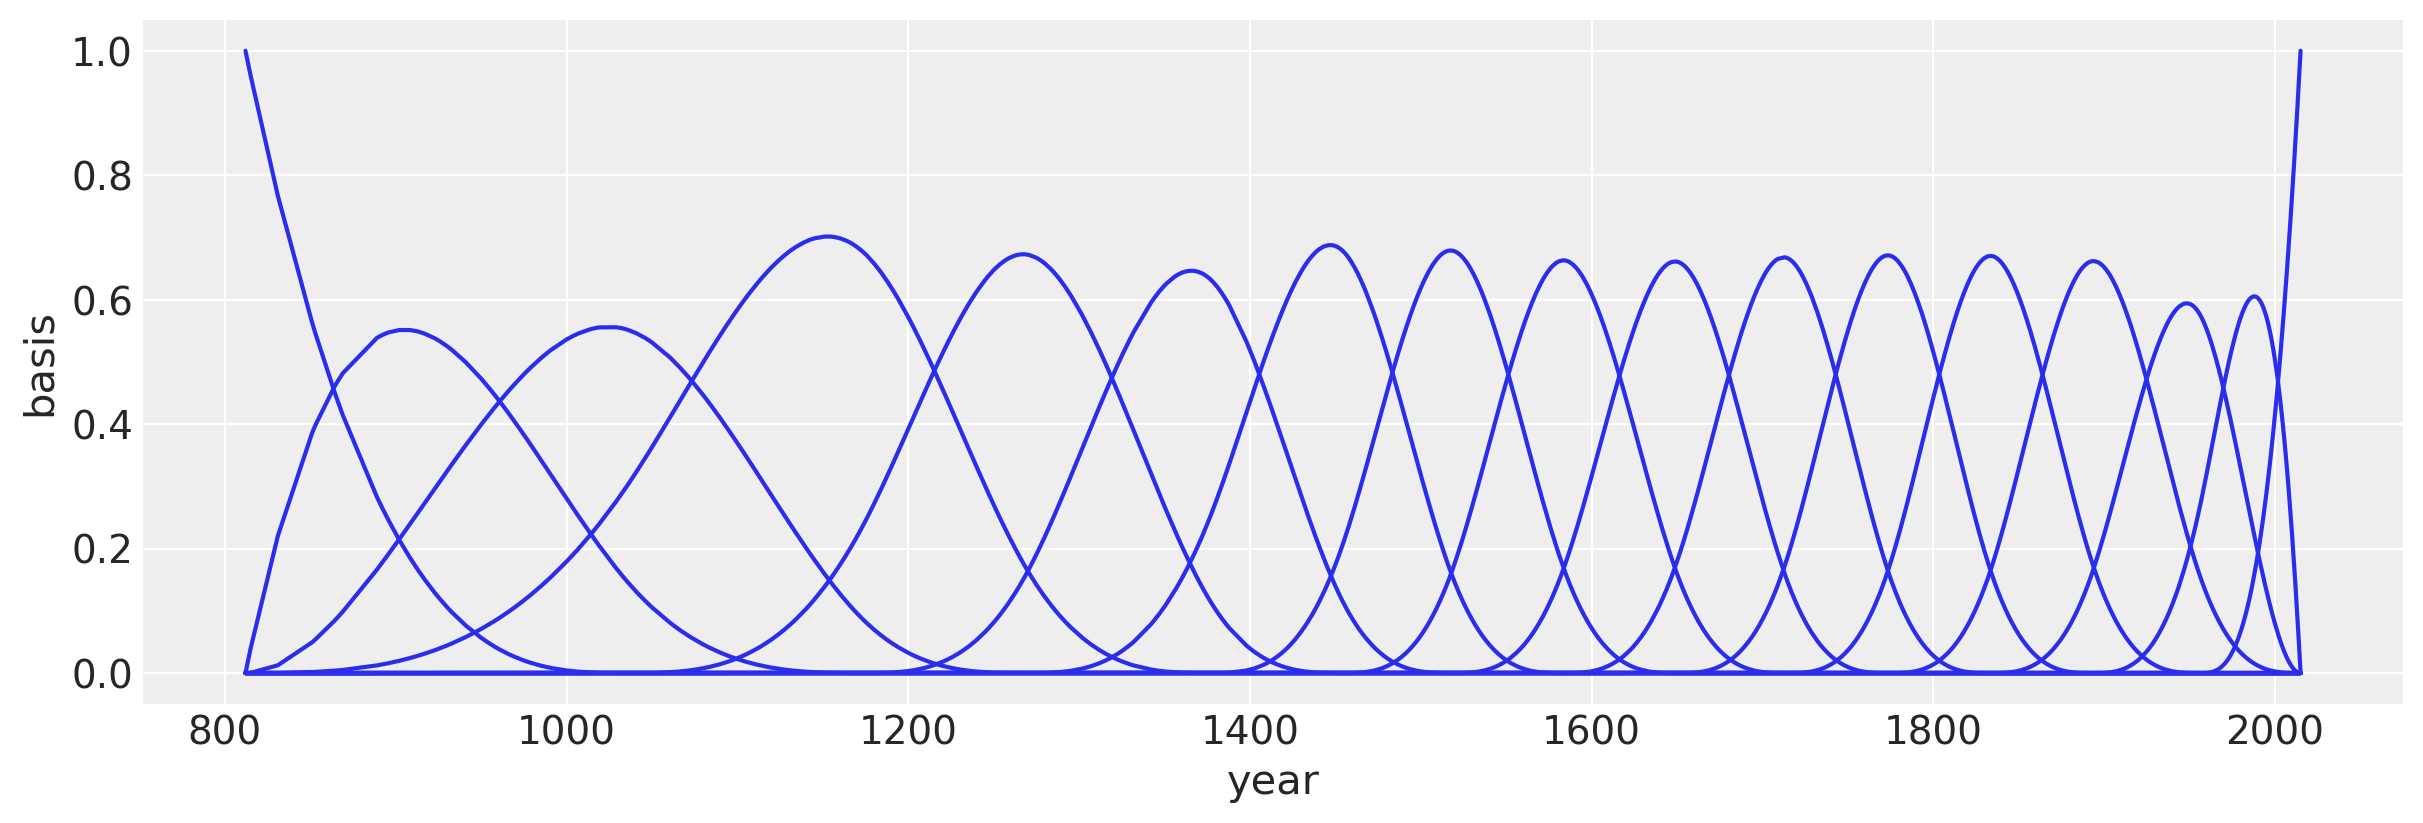

In [137]:
_, ax = plt.subplots(1, 1, figsize=(12, 4))
for i in range(17):
    ax.plot(d2.year, (B[:, i]), color="C0")
ax.set_xlabel("year")
ax.set_ylabel("basis");

We can just pass the `patsy` B matrix directly into the pymc model

**Model**

$$D_{i} \sim \text{Normal}(\mu_{i}, \sigma)$$
$$\mu_{i} = \alpha + \sum_{k=1}^{K} w_{k}B_{k, i}$$

#### Code 4.76

Note: if the mode gets stall instead of sampling try replacing `mu = pm.Deterministic("mu", a + pm.math.dot(B.base, w.T))` with `mu = pm.Deterministic("mu", a + pm.math.dot(np.asarray(B, order="F"), w.T))`

In [143]:
d2.year.values.shape

(827,)

In [142]:
np.asarray(B, order="F").shape # year and knot size + start and end

(827, 17)

$\sigma$ as **exponential distribution** prior: **these are useful for scale parameters which shuld be positive**.
$$\sigma \sim \text{Exponential}(1)$$
means that the exponential with a rate of 1. **Sense of averaging deviation**.

In [138]:
with pm.Model() as m4_7:
    a = pm.Normal("a", 100, 10)
    w = pm.Normal("w", mu=0, sd=10, shape=B.shape[1])
    mu = pm.Deterministic("mu", a + pm.math.dot(np.asarray(B, order="F"), w.T)) # order=F  column-major (Fortran-style)
    # mu = pm.Deterministic("mu", a + pm.math.dot(B.base, w.T))
    sigma = pm.Exponential("sigma", 1)
    D = pm.Normal("D", mu, sigma, observed=d2.doy)
    trace_m4_7 = pm.sample(1000)

/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, w, a]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 18 seconds.
There were 84 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7014971329282808, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8972434389941722, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


#### Code 4.77 (Fig. 4.13. middle)

Weighted basis functions:

In [150]:
trace_m4_7[w].shape, B.shape

((2000, 17), (827, 17))

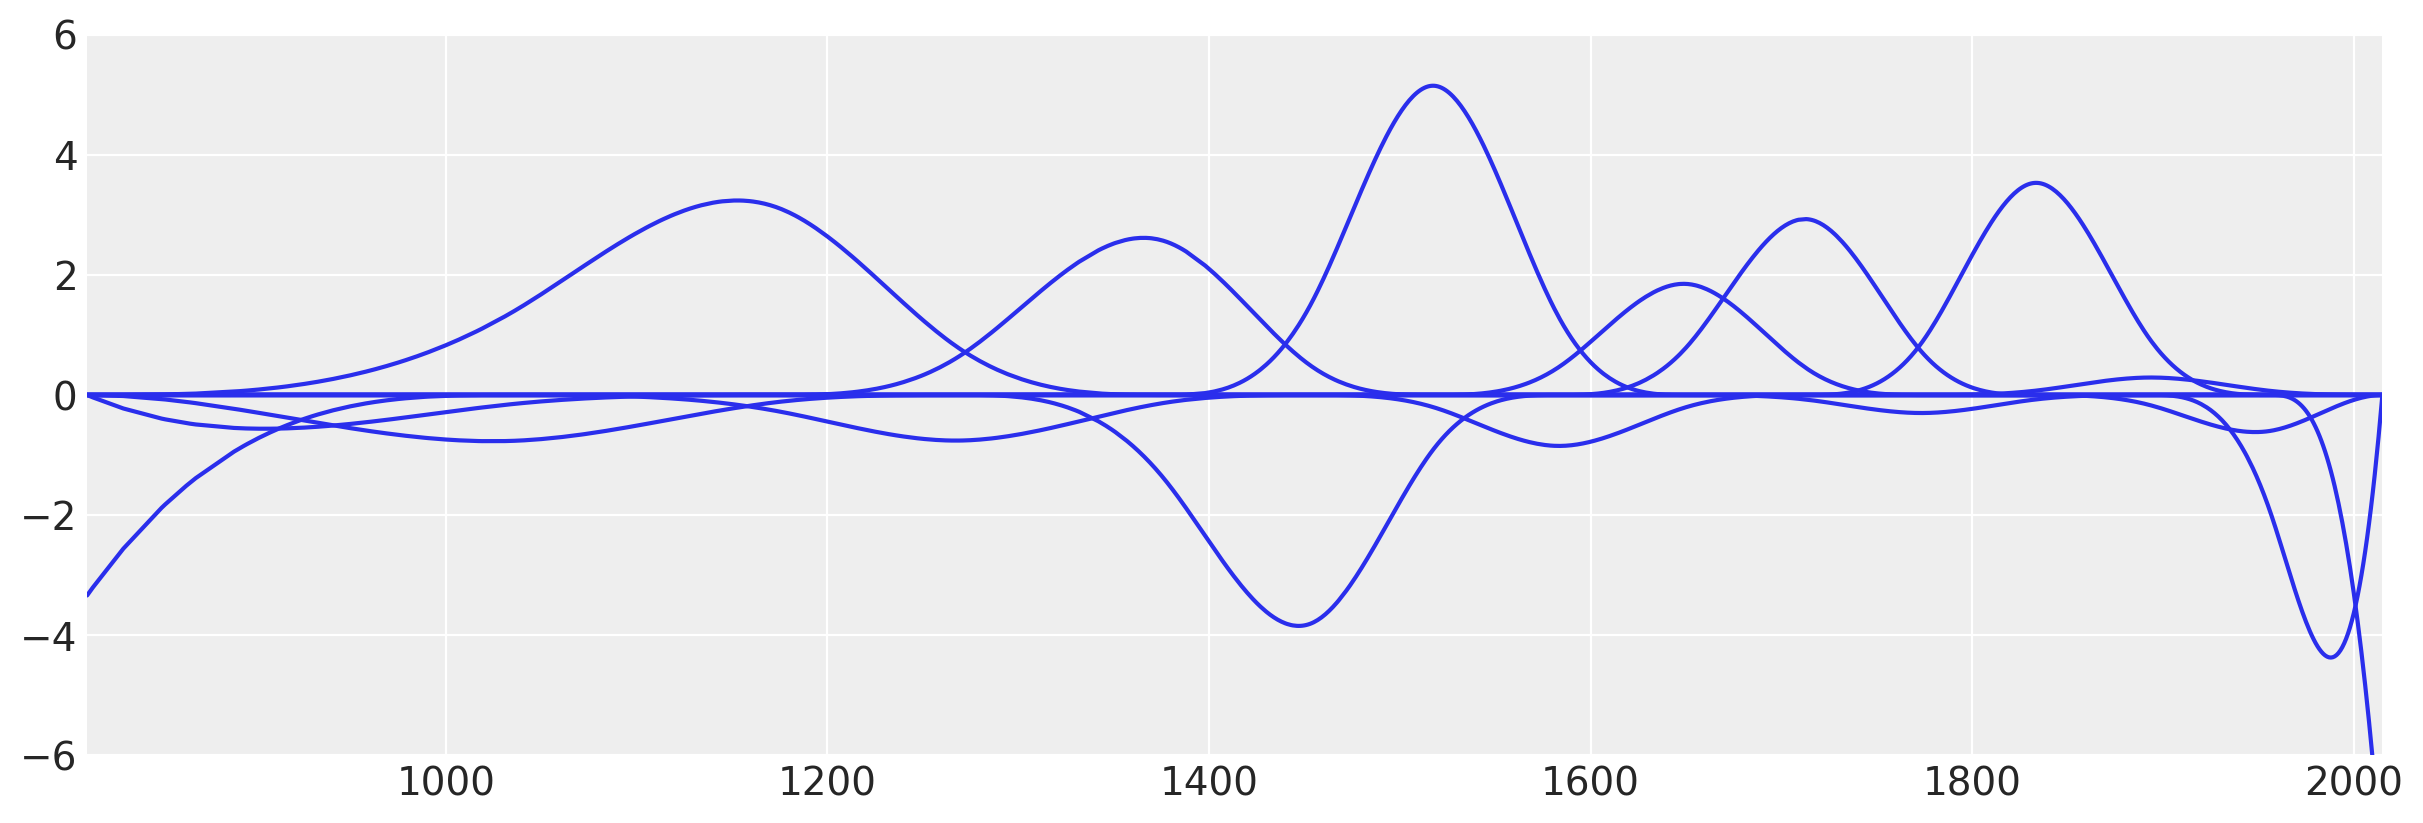

In [151]:
_, ax = plt.subplots(1, 1, figsize=(12, 4))
wp = trace_m4_7[w].mean(0) # same as trace_m4_7['w'].mean(0)
for i in range(17):
    ax.plot(d2.year, (wp[i] * B[:, i]), color="C0")
ax.set_xlim(812, 2015)
ax.set_ylim(-6, 6);

#### Code 4.78

97% posterior inverval for $\mu$

/Users/honshi01/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/stats/stats.py:457: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


Text(0, 0.5, 'days in year')

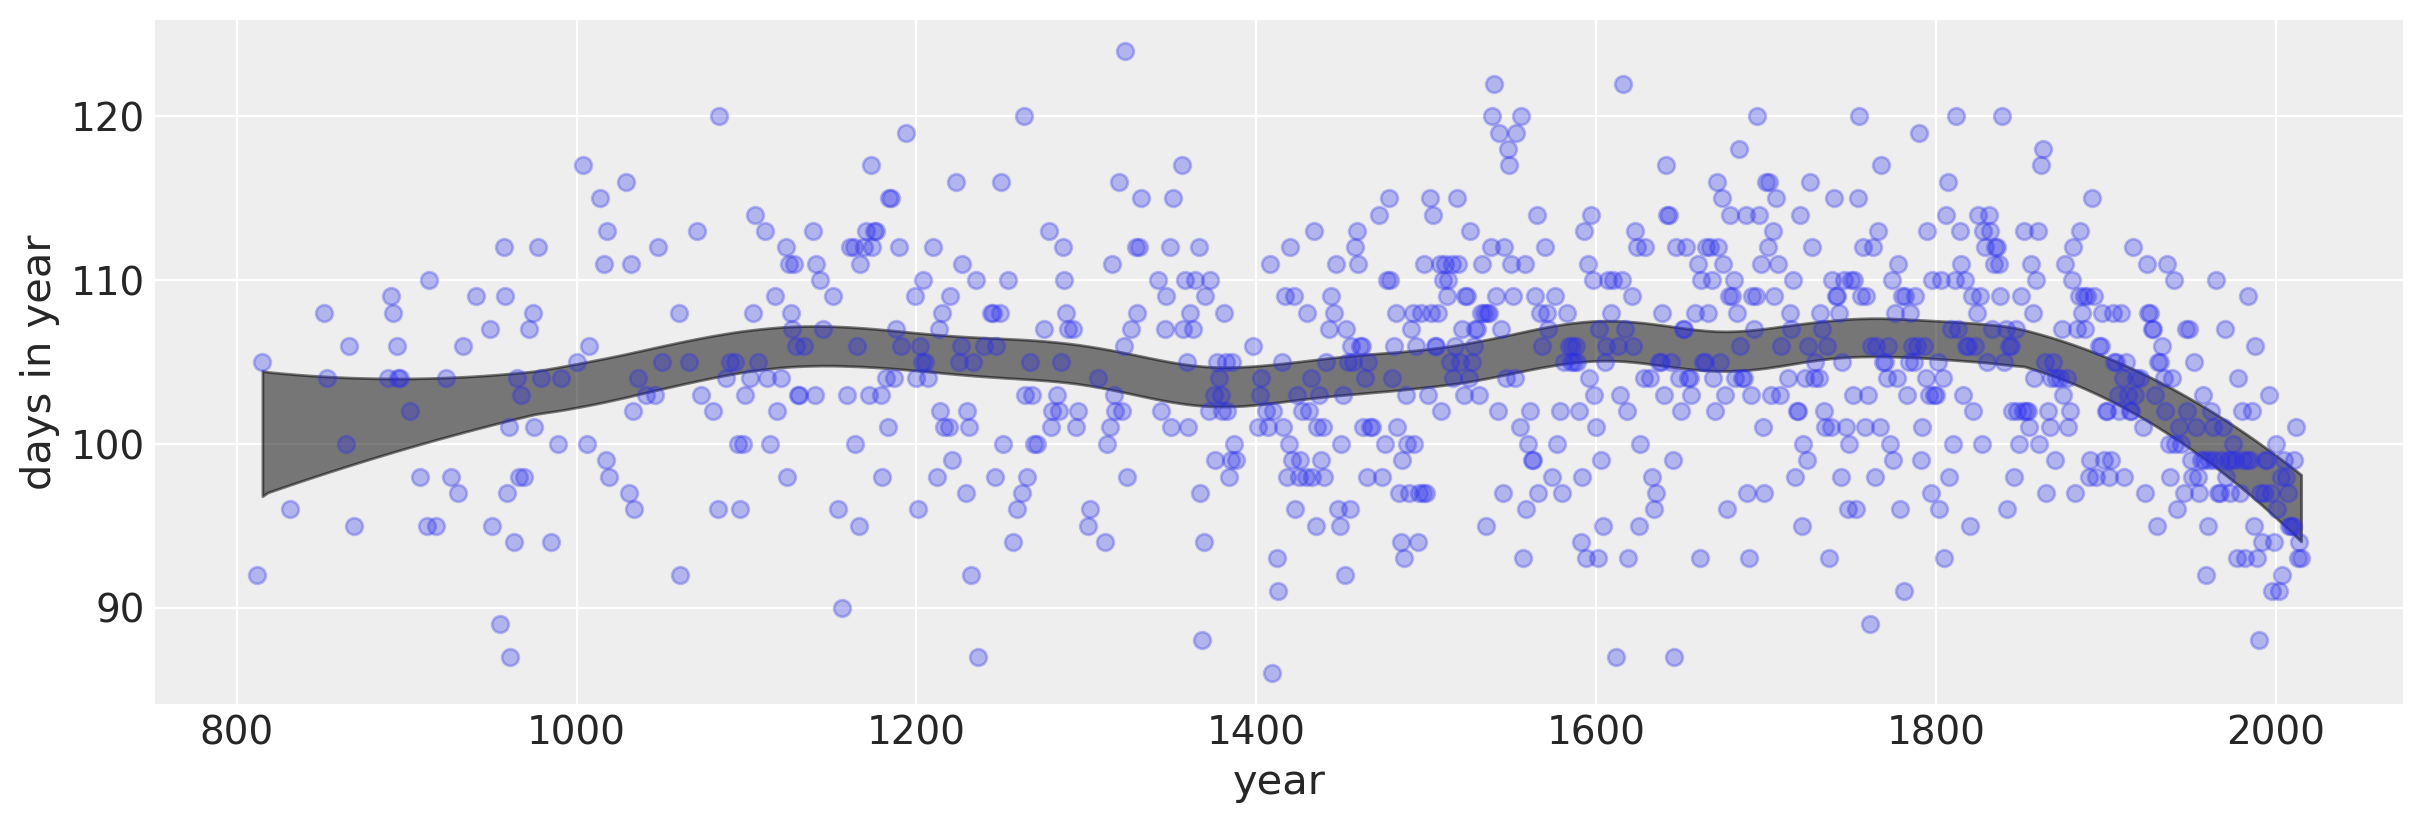

In [154]:
ax = az.plot_hdi(d2.year, trace_m4_7["mu"], color="k")
ax.plot(d2.year, d2.doy, "o", alpha=0.3)
fig = plt.gcf()
fig.set_size_inches(12, 4)
ax.set_xlabel("year")
ax.set_ylabel("days in year")

To assess how many knots are needed, we need model comparison.

### 4.5.3. Smooth functions for a rough world
**Generalized Additive models (GAMs)** focus on predictiong an outcome variable using smooth functions of some predictor variables.

## 4.6. Summary

1. Simple linear regression model
2. Model fitting w/ quadratic approximation (and MCMC for pymc3)

In [81]:
%watermark -n -u -v -iv -w

Last updated: Thu Feb 18 2021

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.20.0

numpy     : 1.19.2
matplotlib: 3.3.4
pymc3     : 3.11.1
arviz     : 0.11.1
seaborn   : 0.11.1
pandas    : 1.2.1
scipy     : 1.6.0

Watermark: 2.2.0

